# CORONA Pandemic  - Analysis

This analysis deals with Time Series Data of all the countries, Provinces affected by Corona Pandemic.

The Confirmed Cases as well as the Fatality has been recorded.

# THE ANALYSIS

1. World Wide Data Analysis
2. Country Wide Data Analysis
3. Province-wise Data Analysis
4. Death Rate Calculation
5. Weighted Death Rate Calculation
6. New Cases/Day for each province


To Be Done:

    1. Forecasting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

In [3]:
w3_df=pd.read_csv('train.csv')

In [4]:
w3_df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
22333,32704,NaN,Zimbabwe,2020-03-30,7.0,1.0
22334,32705,NaN,Zimbabwe,2020-03-31,8.0,1.0
22335,32706,NaN,Zimbabwe,2020-04-01,8.0,1.0
22336,32707,NaN,Zimbabwe,2020-04-02,9.0,1.0


In [5]:
Cases_fat=w3_df.groupby(['Country_Region','Province_State','Date'])['Date','ConfirmedCases','Fatalities'].sum()
Date_Cases=w3_df.groupby('Date')['Province_State','ConfirmedCases','Fatalities'].sum()
country_date_df=w3_df.groupby(['Country_Region','Date'])['Province_State','ConfirmedCases','Fatalities'].sum()

In [6]:
Cases_fat

ConfirmedCases  \
Country_Region Province_State               Date                         
Australia      Australian Capital Territory 2020-01-22             0.0   
                                            2020-01-23             0.0   
                                            2020-01-24             0.0   
                                            2020-01-25             0.0   
                                            2020-01-26             0.0   
...                                                                ...   
United Kingdom Turks and Caicos Islands     2020-03-30             5.0   
                                            2020-03-31             5.0   
                                            2020-04-01             6.0   
                                            2020-04-02             5.0   
                                            2020-04-03             5.0   

                                                        Fatalities  
Country_Region Province_State               Date                    
Australia      Australian Capital Territory 2020-01-22         0.0  
                                            2020-01-23         0.0  
                                            2020-01-24         0.0  
                                            2020-01-25         0.0  
                                            2020-01-26         0.0  
...                                                            ...  
United Kingdom Turks and Caicos Islands     2020-03-30         0.0  
                                            2020-03-31         0.0  
                                            2020-04-01         0.0  
                                            2020-04-02         0.0  
                                            2020-04-03         0.0  

[9490 rows x 2 columns]

# Data Exploration

In [7]:
Date_Cases.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ConfirmedCases,73.0,186858.09589,258094.020831,554.0,40139.0,82688.0,181505.0,1095739.0
Fatalities,73.0,8115.39726,13159.100119,17.0,906.0,2814.0,7126.0,58782.0


In [8]:
Cases_fat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ConfirmedCases,9490.0,674.313909,5429.694904,0.0,0.0,1.0,125.0,102987.0
Fatalities,9490.0,20.333509,213.664627,0.0,0.0,0.0,1.0,3203.0


In [9]:
country_date_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ConfirmedCases,13140.0,1038.100533,8464.321813,0.0,0.0,0.0,16.0,275426.0
Fatalities,13140.0,45.085540,474.122661,0.0,0.0,0.0,0.0,14681.0


# World Wise Analytics

In [10]:
from datetime import datetime
des_Cases_fat1=w3_df
des_Cases_fat1.index=pd.to_datetime(des_Cases_fat1['Date'])

In [11]:
des_Cases_fat1=des_Cases_fat1['2020-04-03'].groupby(['Country_Region']).sum()

In [12]:
des_Cases_fat1

,Id,ConfirmedCases,Fatalities
Country_Region,,,
Afghanistan,73,281.0,6.0
Albania,180,304.0,17.0
Algeria,287,1171.0,105.0
Andorra,394,439.0,16.0
Angola,501,8.0,2.0
...,...,...,...
Venezuela,32280,153.0,7.0
Vietnam,32387,237.0,0.0
West Bank and Gaza,32494,194.0,1.0


In [13]:
des_Cases_fat=des_Cases_fat1.sort_values('ConfirmedCases', ascending=False)

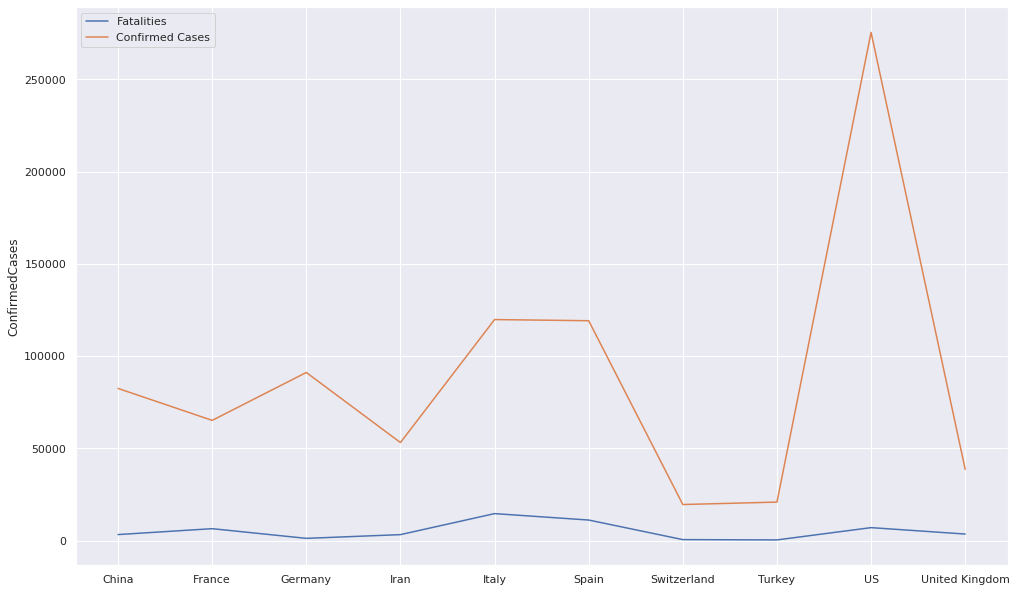

In [15]:
#NEEDS CHANGES
sns.lineplot(x=des_Cases_fat.index.values[:10],y=des_Cases_fat['Fatalities'][:10],label='Fatalities')
sns.lineplot(x=des_Cases_fat.index.values[:10],y=des_Cases_fat['ConfirmedCases'][:10],label='Confirmed Cases')
#plt.figure(figsize=(16,10))
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(16.7,10.27)})

In [16]:
des_Cases_fat

,Id,ConfirmedCases,Fatalities
Country_Region,,,
US,1497555,275426.0,7083.0
Italy,15588,119827.0,14681.0
Spain,23292,119199.0,11198.0
Germany,13555,91159.0,1275.0
China,249579,82511.0,3326.0
...,...,...,...
Burundi,3818,3.0,0.0
Saint Vincent and the Grenadines,22008,3.0,0.0
Sierra Leone,22650,2.0,0.0


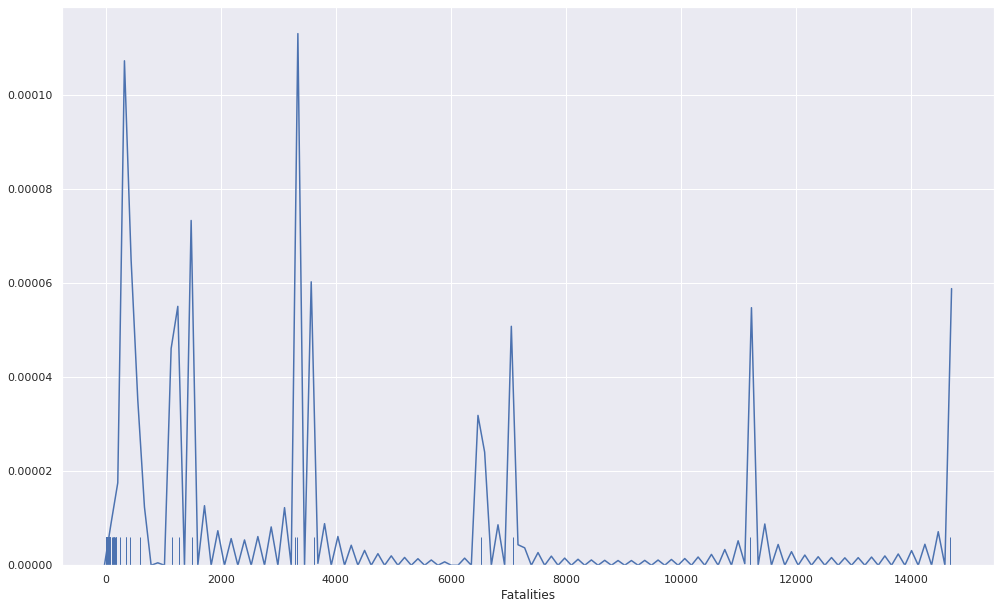

In [17]:
# Distribution plot of Fatalities
#NEEDS CHANGES
sns.distplot(des_Cases_fat['Fatalities'], hist=False, rug=True)

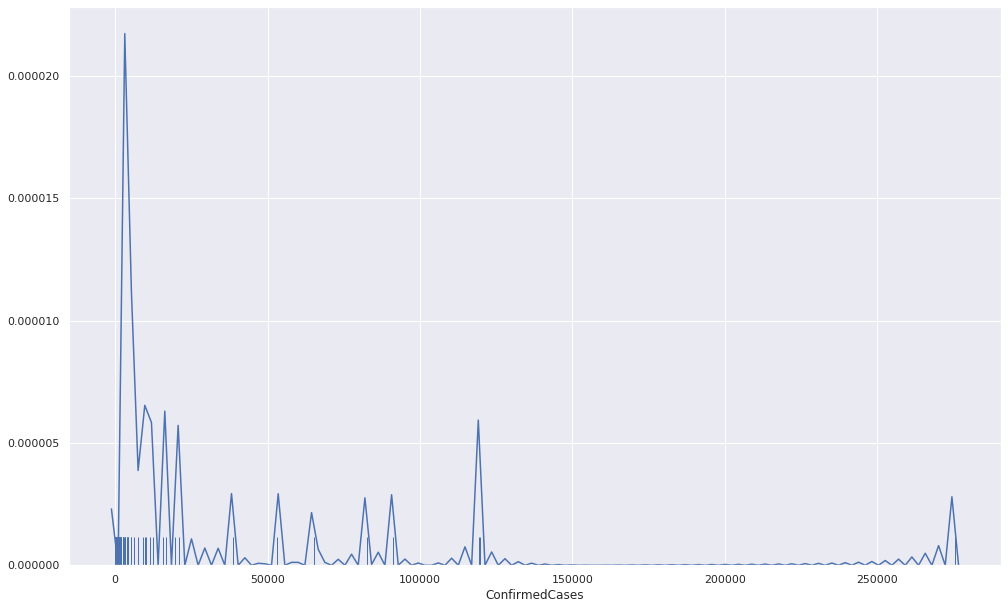

In [18]:
sns.distplot(des_Cases_fat['ConfirmedCases'], hist=False, rug=True)

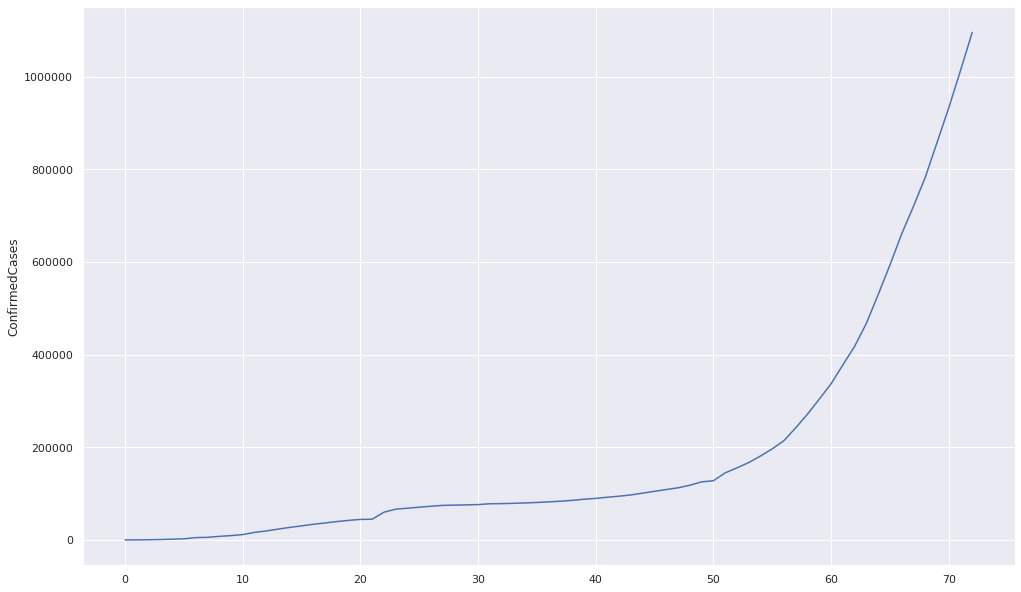

In [19]:
# Line graph to show Days vs Confirmed Cases
days=[i for i in range(len(Date_Cases.index.values))]
sns.lineplot(x=days, y=Date_Cases['ConfirmedCases'])

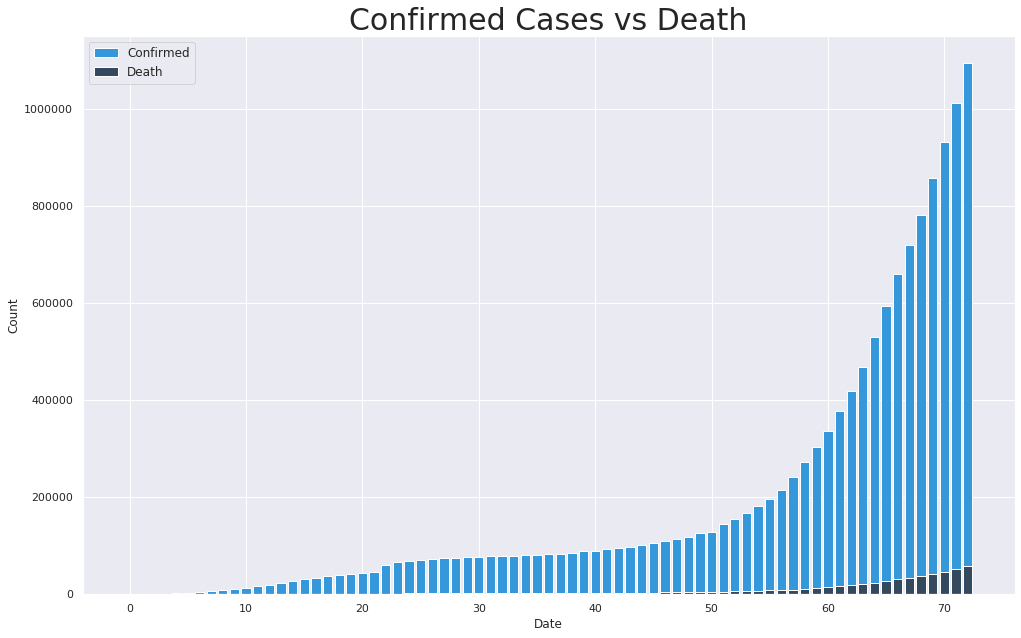

In [20]:
plt.bar(days, Date_Cases['ConfirmedCases'],label="Confirmed", color='#3498db')
plt.bar(days, Date_Cases['Fatalities'],label="Death",color='#34495e')
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases vs Death',fontsize=30)
plt.show()

In [21]:
w3_df_date=w3_df.set_index('Date')
w3_df_date_count=w3_df_date.loc['2020-04-03'].groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].sum()
w3_df_date_count

ConfirmedCases  Fatalities
Country_Region Province_State                                          
Australia      Australian Capital Territory            91.0         1.0
               New South Wales                       2389.0        12.0
               Northern Territory                      22.0         0.0
               Queensland                             873.0         4.0
               South Australia                        396.0         0.0
...                                                     ...         ...
United Kingdom Channel Islands                        232.0         4.0
               Gibraltar                               95.0         0.0
               Isle of Man                            114.0         1.0
               Montserrat                               6.0         0.0
               Turks and Caicos Islands                 5.0         0.0

[130 rows x 2 columns]

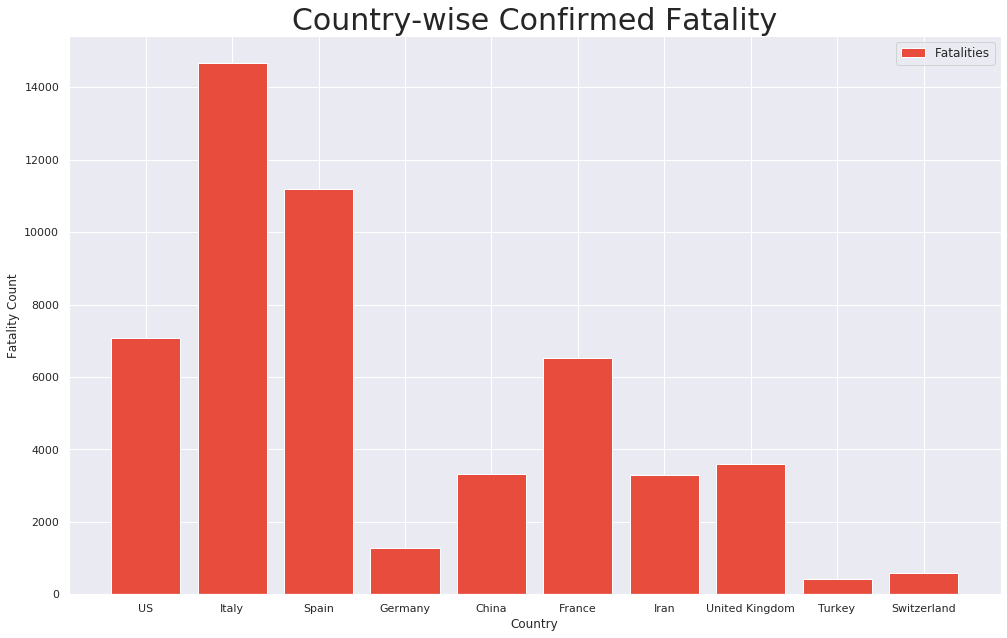

In [22]:
#NEEDS CHANGES
plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['Fatalities'][:10], label='Fatalities', color='#e74c3c')
#plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['ConfirmedCases'][:10],label='Confirmed Cases',color='yellow')
plt.xlabel('Country')
plt.ylabel("Fatality Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Country-wise Confirmed Fatality',fontsize=30)
plt.show()



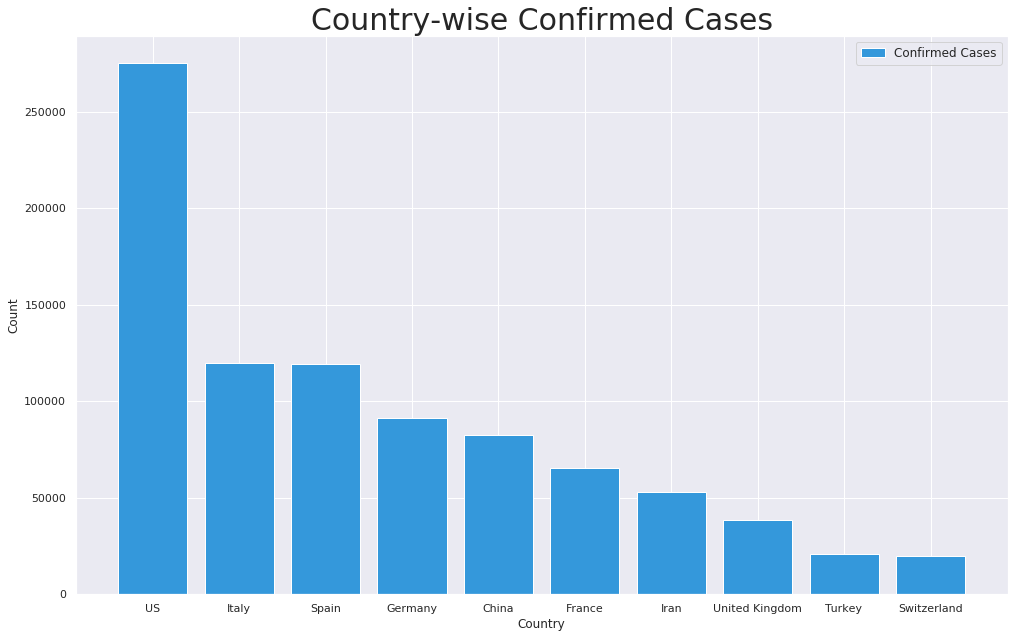

In [23]:
#plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['Fatalities'][:10], label='Fatalities', color='blue')
plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['ConfirmedCases'][:10],label='Confirmed Cases',color='#3498db')
plt.xlabel('Country')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Country-wise Confirmed Cases',fontsize=30)
plt.savefig('Country-wise Confirmed Cases.png')
plt.show()

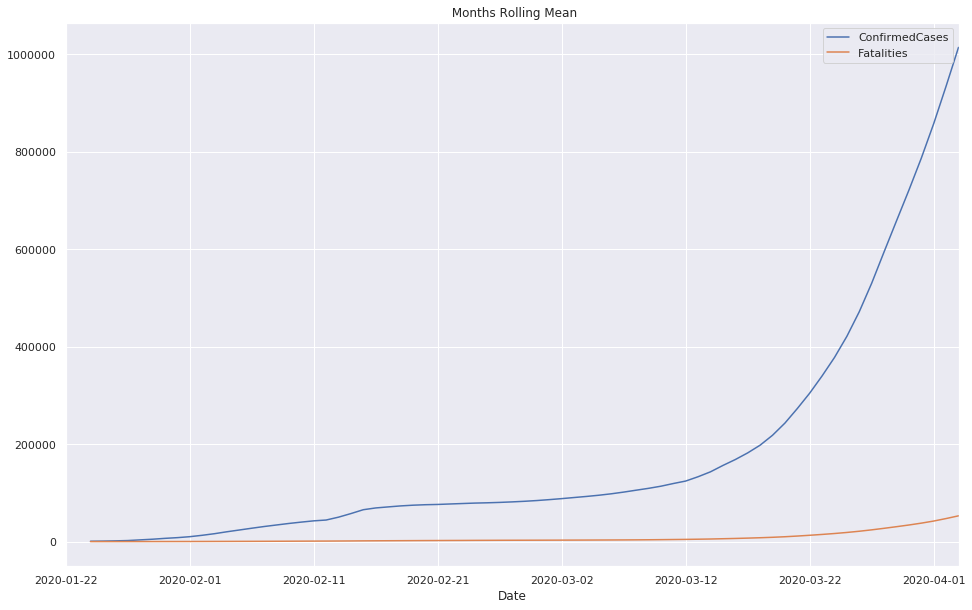

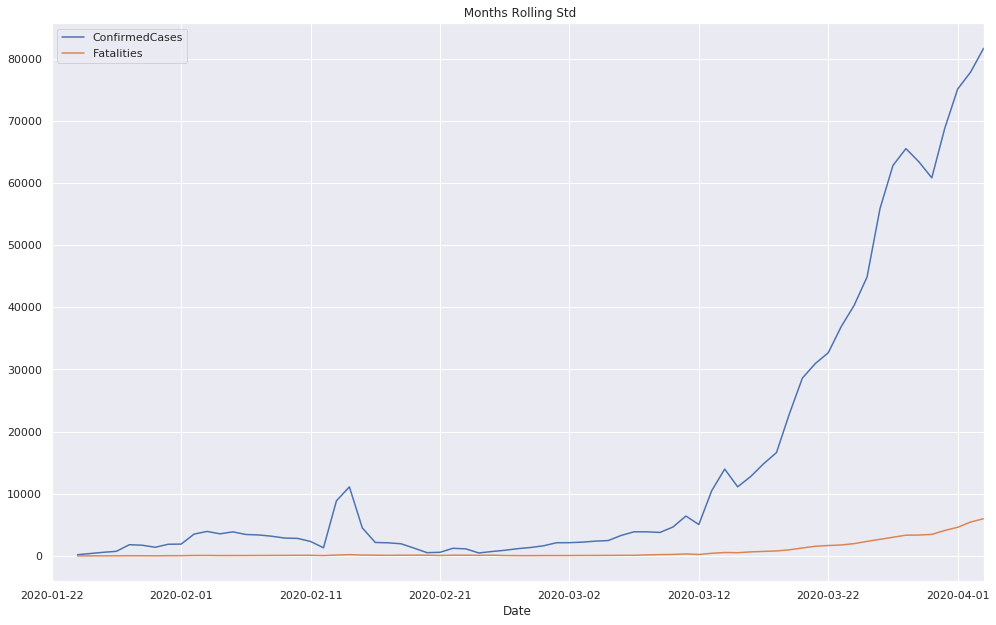

In [24]:
Date_Cases.rolling(3).mean().plot(label = '3 Months Rolling Mean', figsize = (16,10))
plt.title(' Months Rolling Mean')
Date_Cases.rolling(3).std().plot(label = '3 Months Rolling Std')
plt.title(' Months Rolling Std')
#des_Cases_fat.plot()
plt.legend();

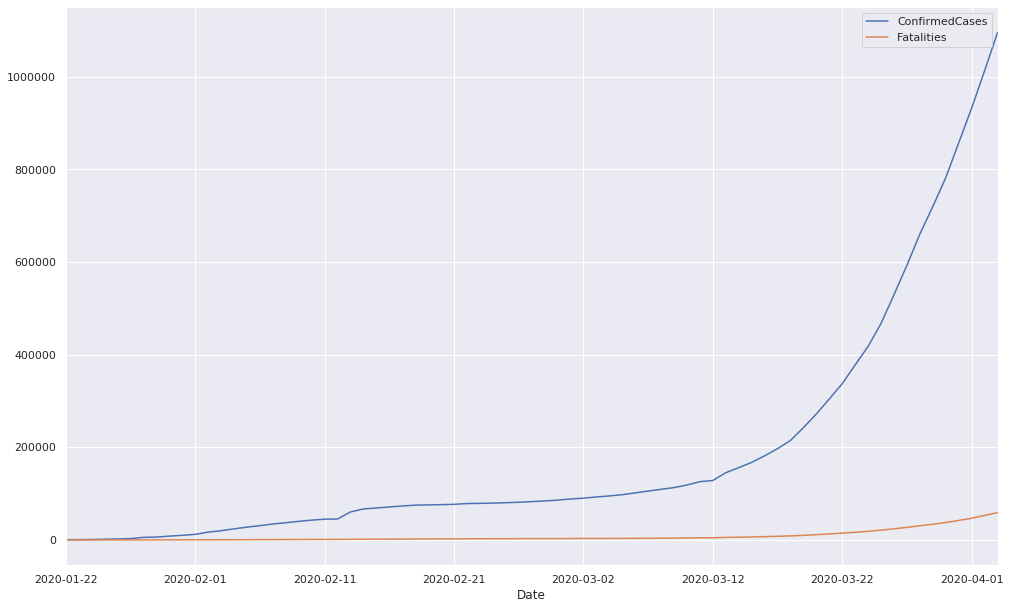

In [25]:
Date_Cases.plot()

/home/sath/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/sath/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


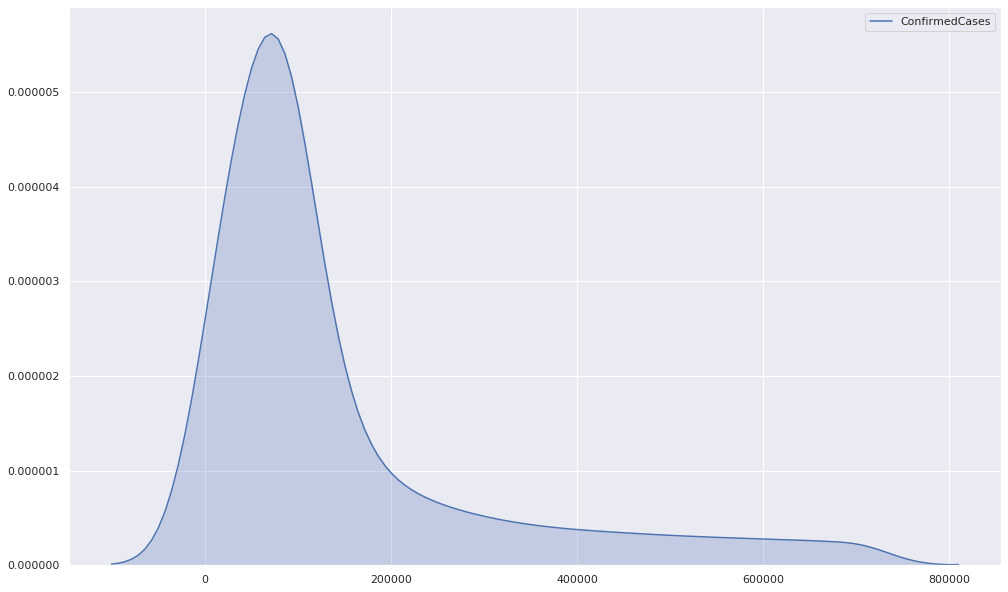

In [26]:
# Kernel Density Estimation of Confirmed Cases
sns.kdeplot(Date_Cases['ConfirmedCases'].rolling(12).mean(), shade=True)

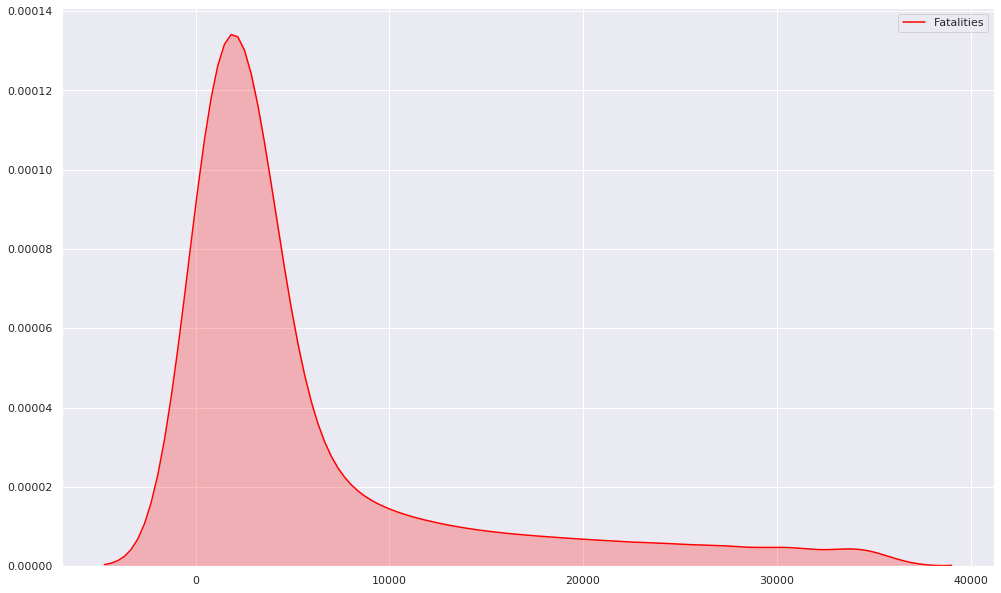

In [28]:
sns.kdeplot(Date_Cases['Fatalities'].rolling(12).mean(), shade=True, color='red')

In [183]:
Date_Cases['Death Ratio']=Date_Cases['Fatalities']/Date_Cases['ConfirmedCases']

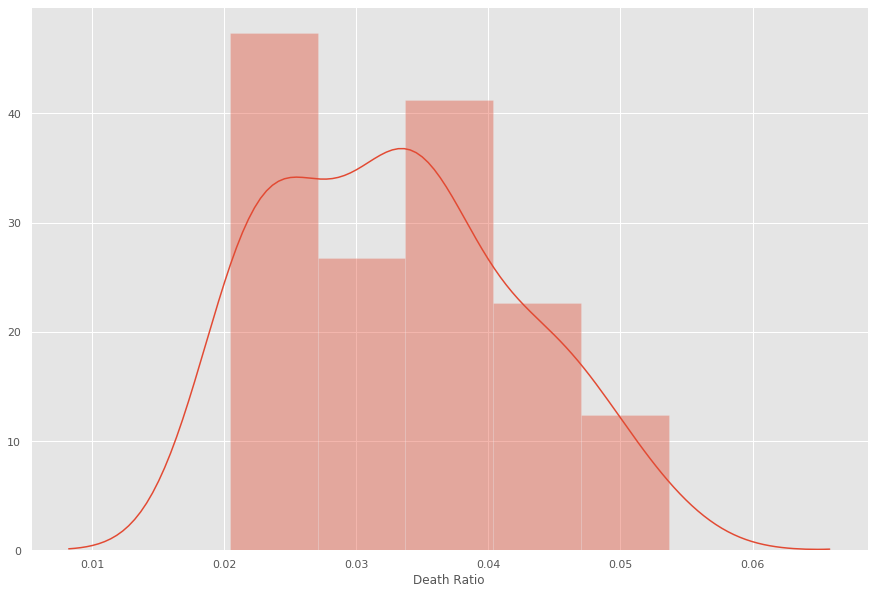

In [184]:
sns.distplot(Date_Cases['Death Ratio'])

In [31]:
del w3_df['Date']
df = w3_df.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases','Fatalities'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values(by='ConfirmedCases') \
                          .groupby(['Country_Region']).sum().sort_values(by='ConfirmedCases',ascending = False)

df = pd.DataFrame(df).reset_index()


df = pd.DataFrame(df)

df_new_cases = pd.DataFrame(w3_df.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum() \
                            .reset_index()).sort_values(['Country_Region','Date'])
df_new_cases.ConfirmedCases = df_new_cases.ConfirmedCases.diff().fillna(0)
df_new_cases = df_new_cases.loc[df_new_cases['Date'] == max(df_new_cases['Date']),['Country_Region','ConfirmedCases']]
df_new_cases.rename(columns={"ConfirmedCases": "NewCases"}, inplace=True, errors="raise")

df_new_deaths = pd.DataFrame(w3_df.fillna('NA').groupby(['Country_Region','Date'])['Fatalities'].sum() \
                            .reset_index()).sort_values(['Country_Region','Date'])

df_new_deaths.Fatalities = df_new_deaths.Fatalities.diff().fillna(0)
df_new_deaths = df_new_deaths.loc[df_new_deaths['Date'] == max(df_new_deaths['Date']),['Country_Region','Fatalities']]

df_new_deaths.rename(columns={"Fatalities": "NewFatalities"}, inplace=True, errors="raise")

merged = df.merge(df_new_cases, left_on='Country_Region', right_on='Country_Region')\
            .merge(df_new_deaths, left_on='Country_Region', right_on='Country_Region')


merged.style.background_gradient(cmap="Blues", subset=['ConfirmedCases'])\
            .background_gradient(cmap="Reds", subset=['Fatalities'])\
            .background_gradient(cmap="Blues", subset=['NewCases'])\
            .background_gradient(cmap="Reds", subset=['NewFatalities'])

,Country_Region,ConfirmedCases,Fatalities,NewCases,NewFatalities
0,US,275426,7084,32131,1161
1,Italy,119827,14681,4585,766
2,Spain,119199,11198,7134,850
3,Germany,91159,1275,6365,168
4,China,82512,3326,79,4
5,France,65202,6520,5273,1122
6,Iran,53183,3294,2715,134
7,United Kingdom,38690,3611,4516,685
8,Turkey,20921,425,2786,69
9,Switzerland,19606,591,779,55


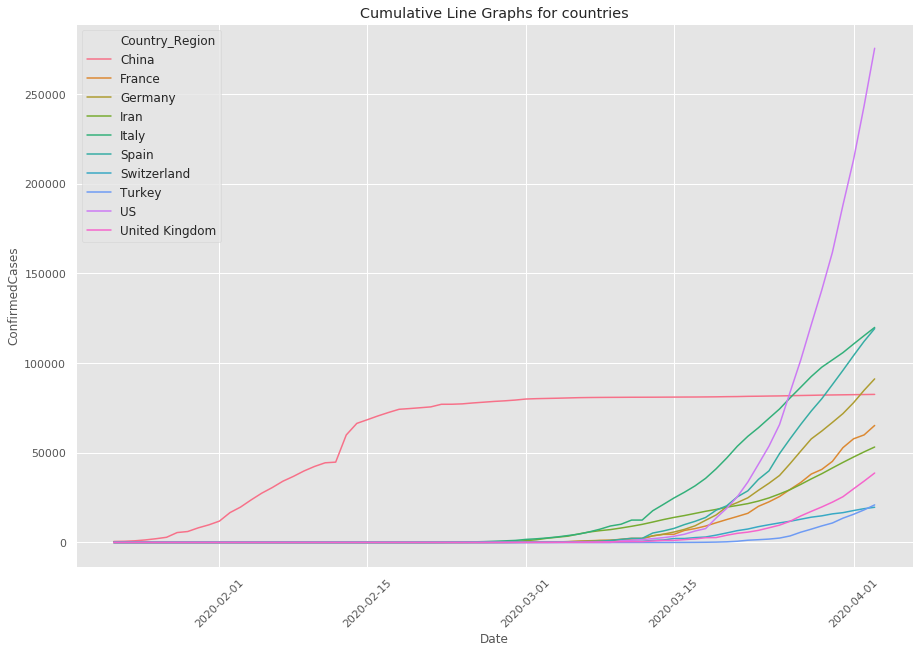

In [88]:
# Remove columns we do not need
cols = ['Fatalities']
times_series_cntr = w3_df.drop(cols, axis=1).fillna('N/A')

# Aggregate cases by date and country
times_series_cntr = times_series_cntr.groupby(['Date','Province_State','Country_Region'])['ConfirmedCases'].max()\
                    .groupby(['Date','Country_Region']).sum()\
                    .reset_index()

# Indexing with Time Series Data
times_series_cntr = times_series_cntr.set_index('Date')

import seaborn as sns
from matplotlib import rcParams, pyplot as plt, style as style

style.use('ggplot')
rcParams['figure.figsize'] = 15,10
country_province = w3_df.fillna('N/A').groupby(['Country_Region','Province_State'])['ConfirmedCases', 'Fatalities'].max().sort_values(by='ConfirmedCases', ascending=False)

countries = country_province.groupby('Country_Region')['ConfirmedCases','Fatalities'].sum().sort_values(by= 'ConfirmedCases',ascending=False)

countries['Country_Region'] = countries.index

# Unpivot the dataframe from wide to long format
df_long = pd.melt(countries, id_vars=['Country_Region'] , value_vars=['ConfirmedCases','Fatalities'])

#Top countries by confirmed cases
top_countries = countries.index[:10]

top_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(top_countries)]
plt.xticks(rotation=45)


ax = sns.lineplot(x=top_countries_tm.index, y="ConfirmedCases", hue="Country_Region", data=top_countries_tm).set_title('Cumulative Line Graphs for countries')
plt.legend(loc=2, prop={'size': 12});

# Death Rate

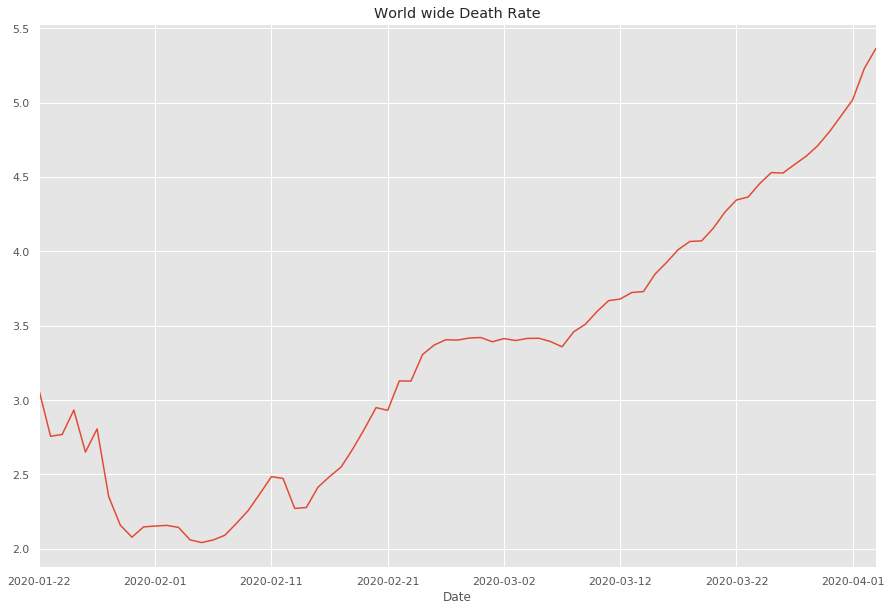

In [37]:
Date_Cases['Death Ratio']=Date_Cases['Fatalities']/Date_Cases['ConfirmedCases']
Date_Cases['Death Ratio']=Date_Cases['Death Ratio']*100
Date_Cases['Death Ratio'].plot()
plt.title('World wide Death Rate')
plt.savefig('World wide Death Rate.png')

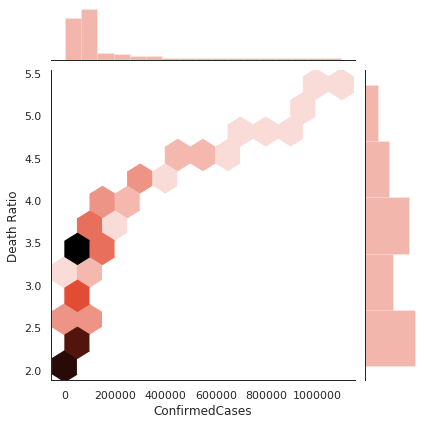

In [38]:
des_Cases_fat['Death Ratio']=np.absolute(des_Cases_fat['Fatalities']/des_Cases_fat['ConfirmedCases'])*100
with sns.axes_style('white'):
    sns.jointplot(Date_Cases["ConfirmedCases"], Date_Cases["Death Ratio"], data=Date_Cases, kind='hex')

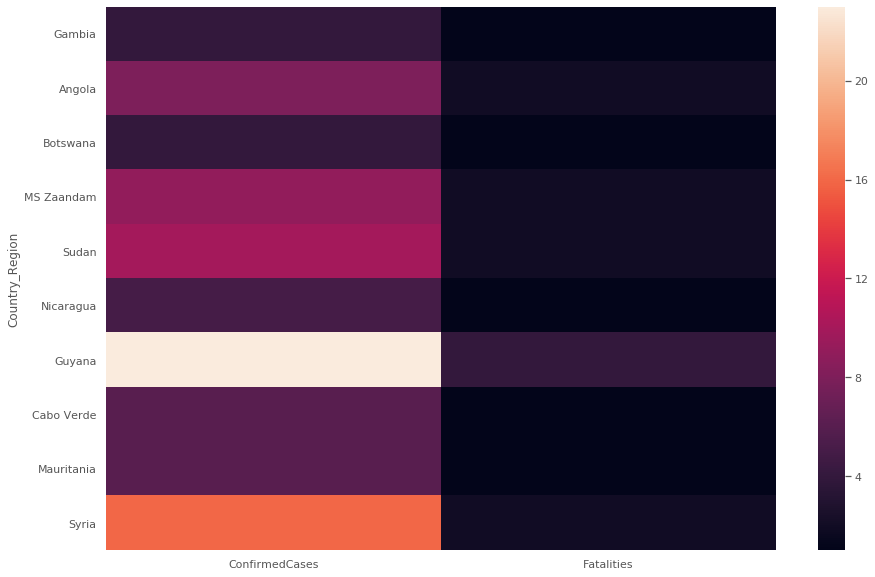

In [39]:
des_death_Rate=des_Cases_fat.sort_values('Death Ratio', ascending=False)[:20]
sns.heatmap(des_death_Rate[['ConfirmedCases','Fatalities']][:10])

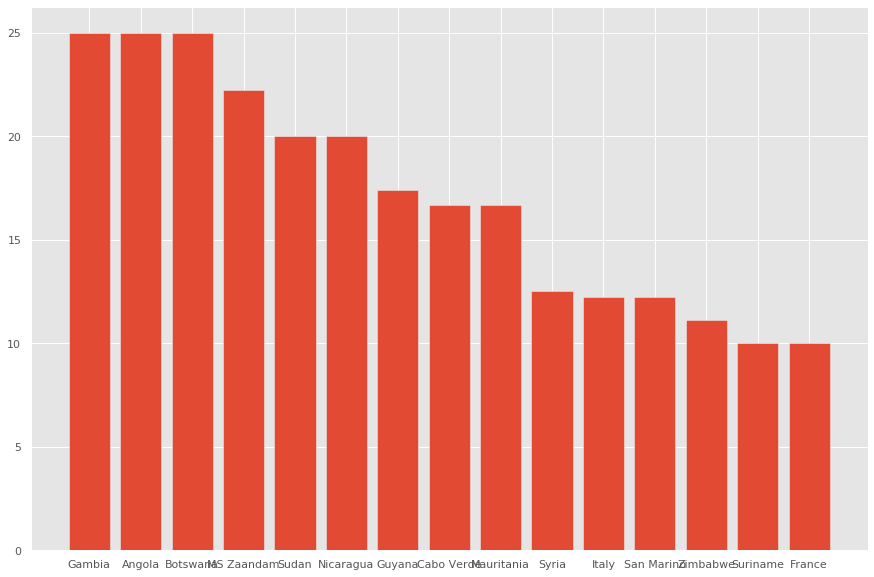

In [40]:
plt.bar(des_Cases_fat.sort_values('Death Ratio', ascending=False)[:15].index,des_Cases_fat.sort_values('Death Ratio', ascending=False)[:15]['Death Ratio'])
plt.savefig('Facts-And-Figs/NaiveDeathRate.png')

In [41]:
des_Cases_fat.sort_values('Death Ratio', ascending=False)[:20]

,Id,ConfirmedCases,Fatalities,Death Ratio
Country_Region,,,,
Gambia,13341,4.0,1.0,25.000000
Angola,501,8.0,2.0,25.000000
Botswana,3176,4.0,1.0,25.000000
MS Zaandam,17514,9.0,2.0,22.222222
Sudan,23506,10.0,2.0,20.000000
Nicaragua,19868,5.0,1.0,20.000000
Guyana,14304,23.0,4.0,17.391304
Cabo Verde,3925,6.0,1.0,16.666667
Mauritania,18156,6.0,1.0,16.666667


# Death Ratio with weights

In [42]:
des_Cases_fat['Death Ratio Weights']=des_Cases_fat['ConfirmedCases']/des_Cases_fat['ConfirmedCases'].sum()
des_Cases_fat['Death Ratio with Weights']=des_Cases_fat['Death Ratio']*des_Cases_fat['Death Ratio Weights']

In [43]:
des_Cases_fat

,Id,ConfirmedCases,Fatalities,Death Ratio,Death Ratio Weights,Death Ratio with Weights
Country_Region,,,,,,
US,1497555,275426.0,7083.0,2.571653,2.513610e-01,0.646413
Italy,15588,119827.0,14681.0,12.251830,1.093572e-01,1.339826
Spain,23292,119199.0,11198.0,9.394374,1.087841e-01,1.021959
Germany,13555,91159.0,1275.0,1.398655,8.319408e-02,0.116360
China,249579,82511.0,3326.0,4.030978,7.530169e-02,0.303539
...,...,...,...,...,...,...
Burundi,3818,3.0,0.0,0.000000,2.737878e-06,0.000000
Saint Vincent and the Grenadines,22008,3.0,0.0,0.000000,2.737878e-06,0.000000
Sierra Leone,22650,2.0,0.0,0.000000,1.825252e-06,0.000000


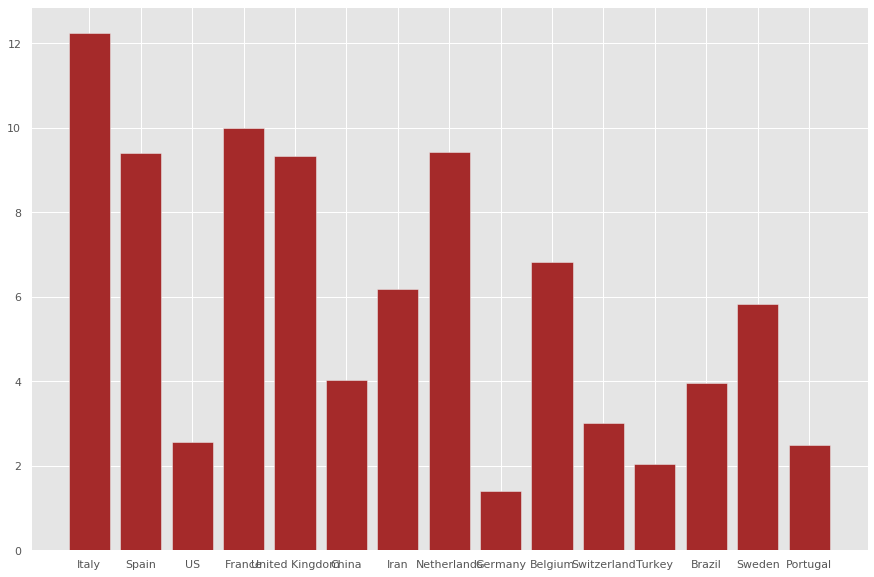

In [44]:
plt.bar(des_Cases_fat.sort_values('Death Ratio with Weights', ascending=False)[:15].index,des_Cases_fat.sort_values('Death Ratio with Weights', ascending=False)[:15]['Death Ratio'], color='brown')
plt.savefig('Facts-And-Figs/Weighted-DeathRatio.png')

In [45]:
des_Cases_fat.sort_values('Death Ratio', ascending=False)[:25].index

Index(['Gambia', 'Angola', 'Botswana', 'MS Zaandam', 'Sudan', 'Nicaragua',
       'Guyana', 'Cabo Verde', 'Mauritania', 'Syria', 'Italy', 'San Marino',
       'Zimbabwe', 'Suriname', 'France', 'Bangladesh', 'Congo (Kinshasa)',
       'Netherlands', 'Spain', 'United Kingdom', 'Indonesia', 'Libya',
       'Congo (Brazzaville)', 'Algeria', 'Mali'],
      dtype='object', name='Country_Region')

# Function to Check Results Country-Wise

In [46]:
def analysis_by_country(w3_df,country):
    frame_list=[]
    country_dict={}
    for i in w3_df['Country_Region'].unique():
        #print(i)
        frame_list.append(w3_df[w3_df['Country_Region']==i])
    
    countries=[i for i in w3_df['Country_Region'].unique()]
    for i in range(len(frame_list)):
        country_dict[countries[i]]=frame_list[i]
 
    plt.bar([i for i in range(len(country_dict[country].reset_index()['Date'].unique()))],country_dict[country].reset_index().groupby('Date')['ConfirmedCases'].sum(), label='yellow')
    plt.bar([i for i in range(len(country_dict[country].reset_index()['Date'].unique()))],country_dict[country].reset_index().groupby('Date')['Fatalities'].sum(), label='red')
    plt.legend()
    plt.title('%s - Confirmed vs Fatalities' % country)
    plt.show()

    sns.lineplot(x=[i for i in range(len(country_dict[country].groupby('Date').sum().index.values))],y=country_dict[country].groupby('Date').sum()['ConfirmedCases'], color='orange')
    sns.lineplot(x=[i for i in range(len(country_dict[country].groupby('Date').sum().index.values))],y=country_dict[country].groupby('Date').sum()['Fatalities'], color='red')
    plt.title('%s - Confirmed vs Fatalities Trend' % country)
    plt.show()

    sns.lineplot(x=[i for i in range(len(country_dict[country].groupby('Date').sum().index.values))],y=country_dict[country].groupby('Date').sum()['Fatalities']/country_dict[country].groupby('Date').sum()['ConfirmedCases']*100, color='blue').set_title('Death Ratio')
    plt.show()

# Analysis for US

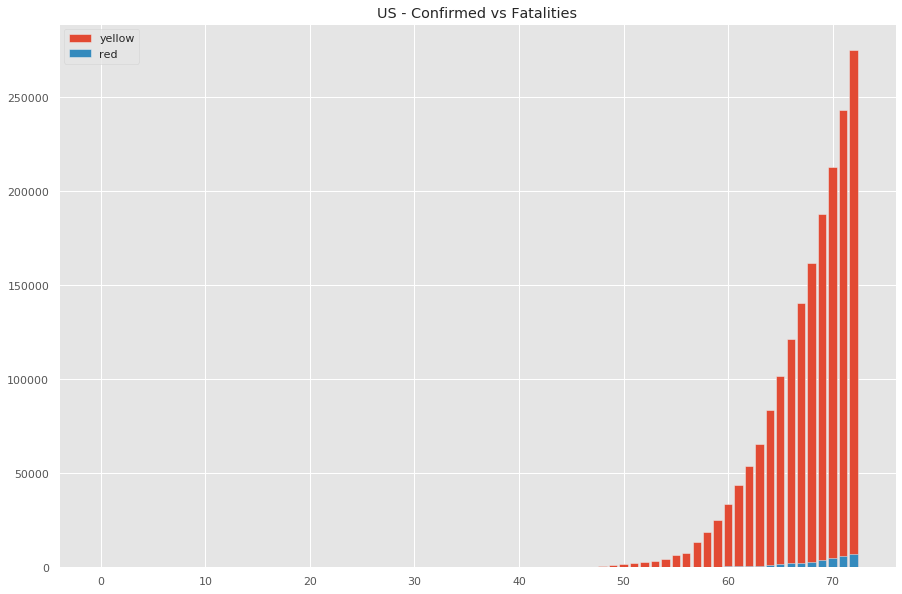

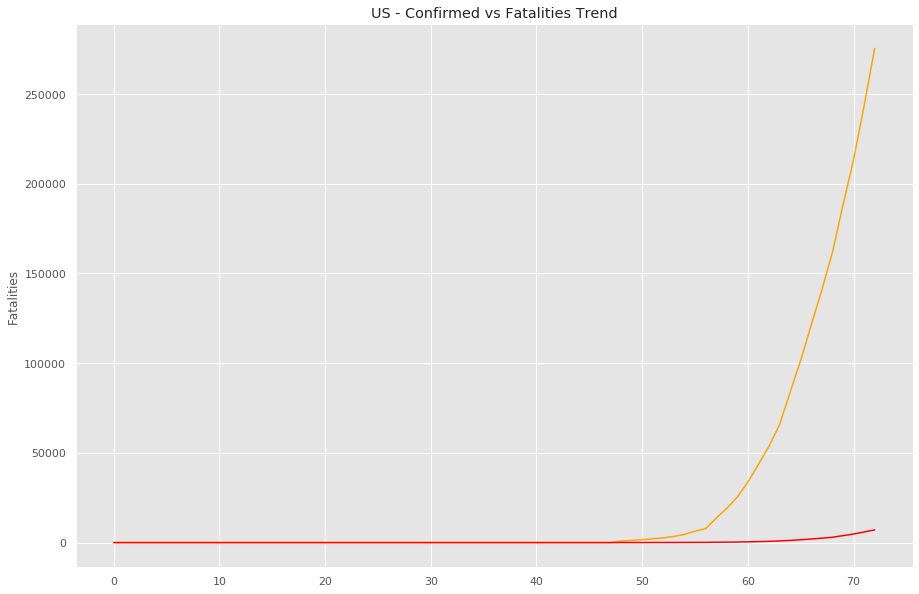

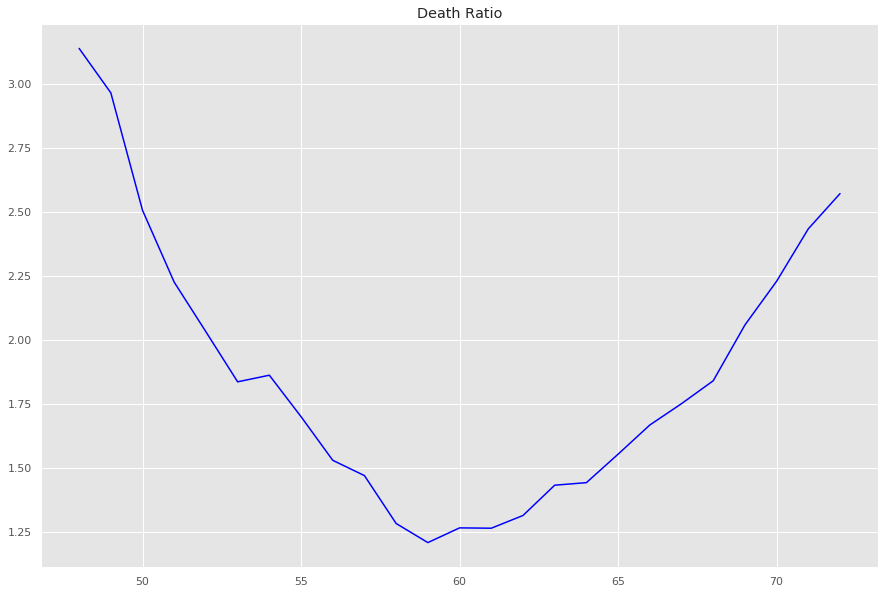

In [48]:
#del w3_df['Date']
analysis_by_country(w3_df,'US')

# Analysis for India

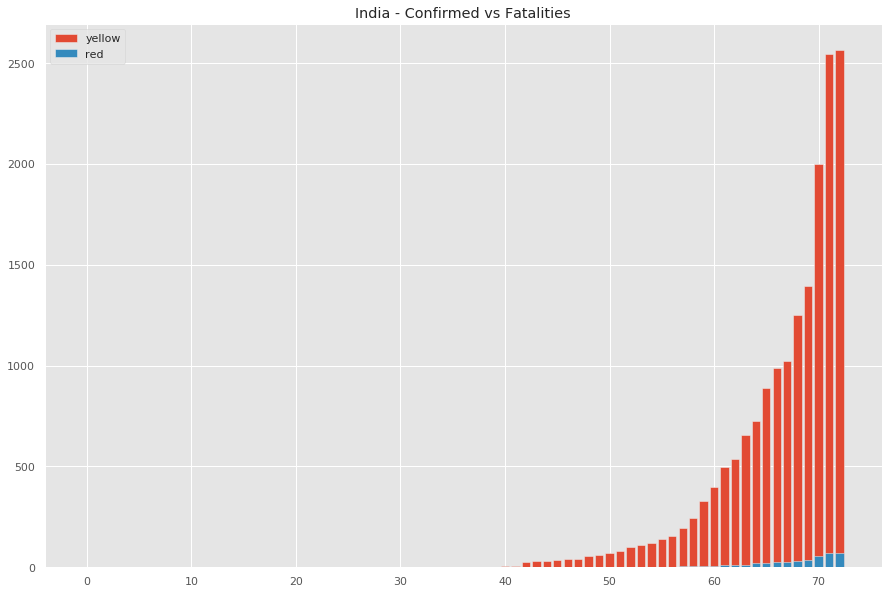

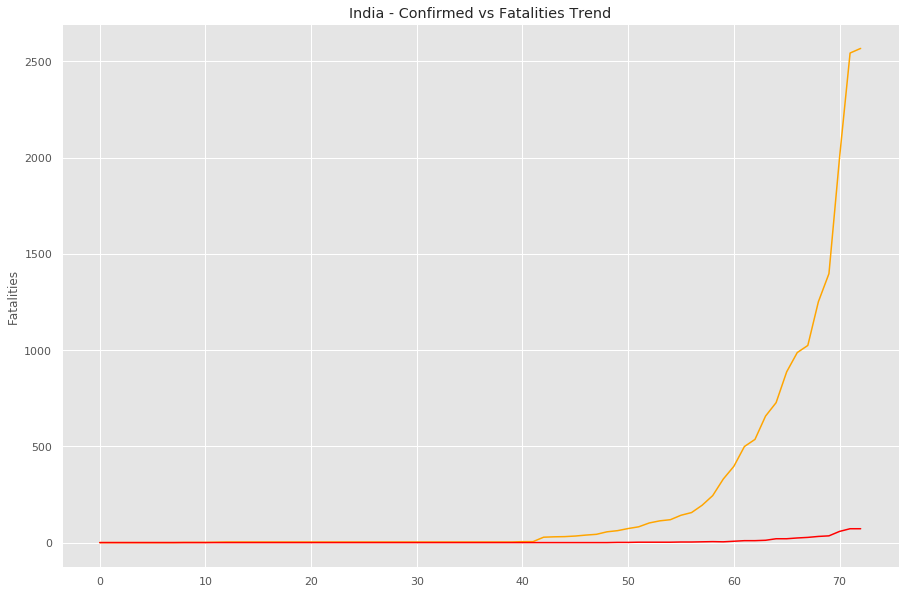

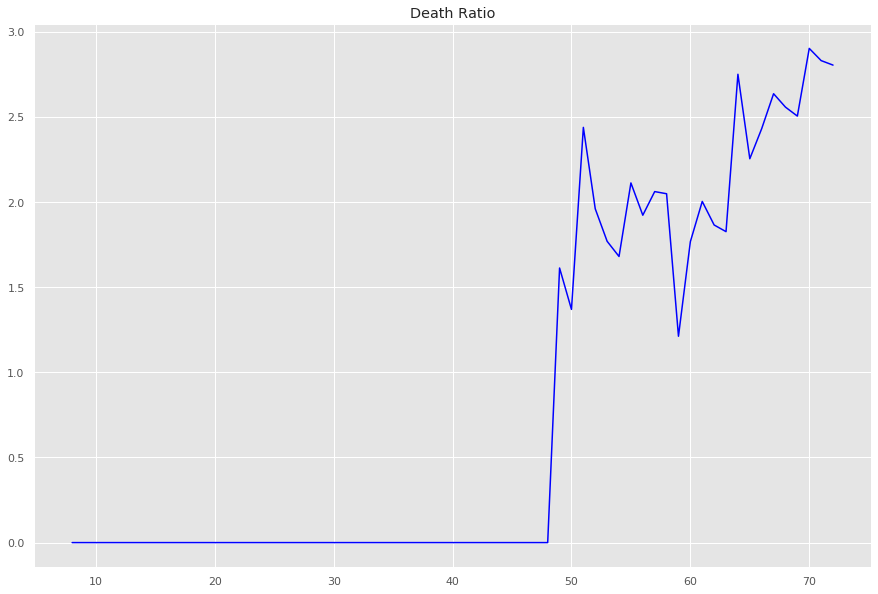

In [49]:
analysis_by_country(w3_df,'India')

# Analysis for Gambia

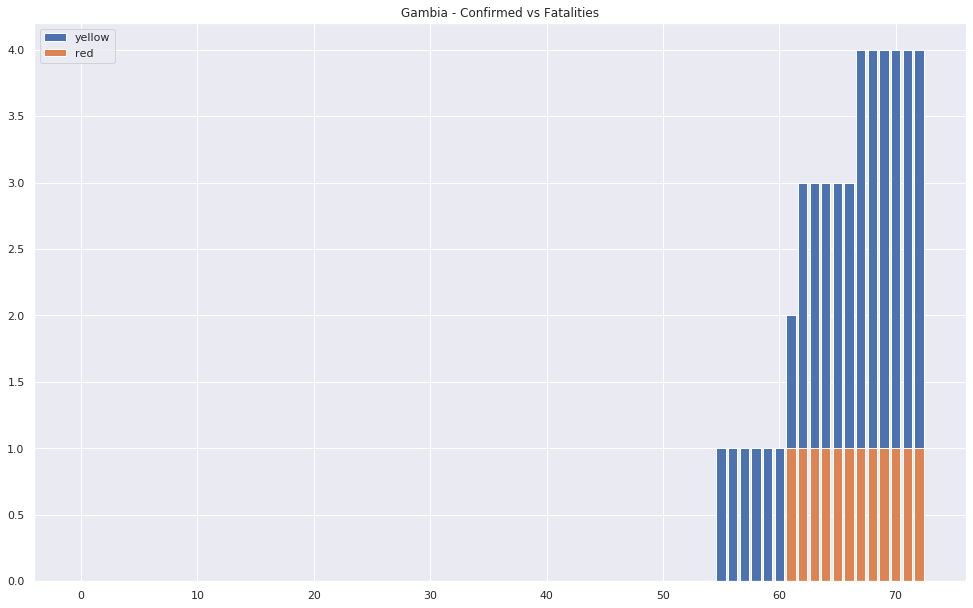

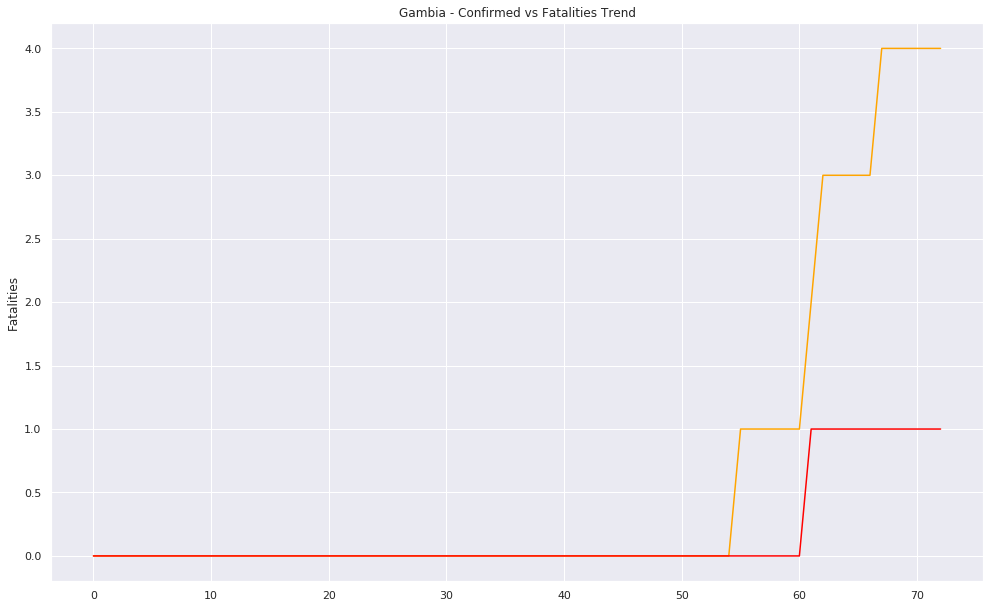

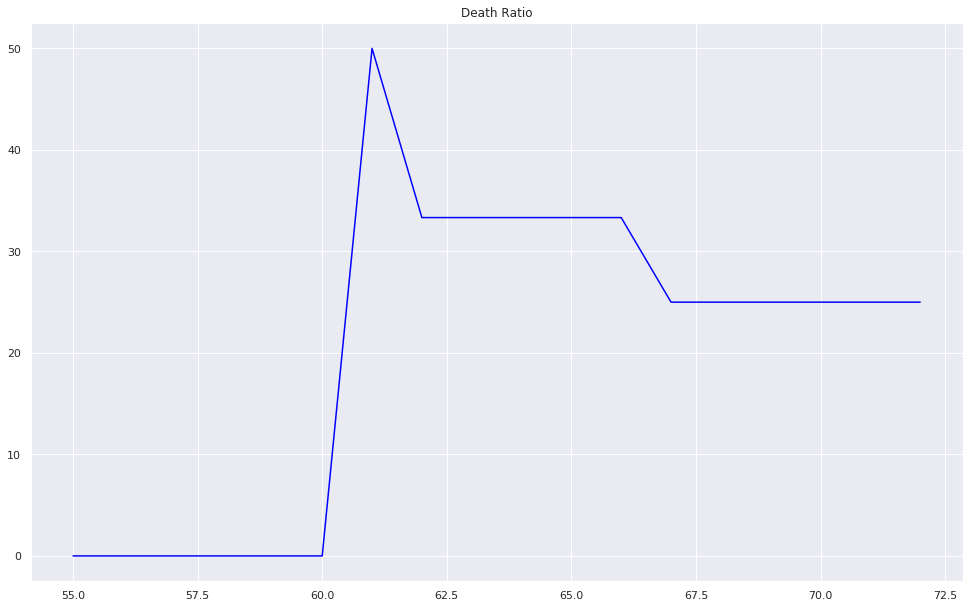

In [99]:
analysis_by_country(w3_df,'Gambia')

# Analysis for Singapore

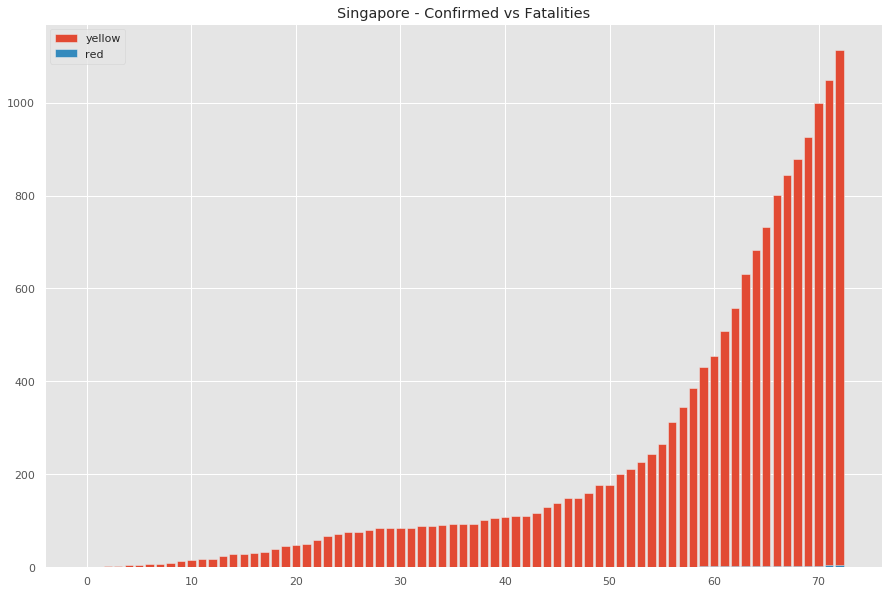

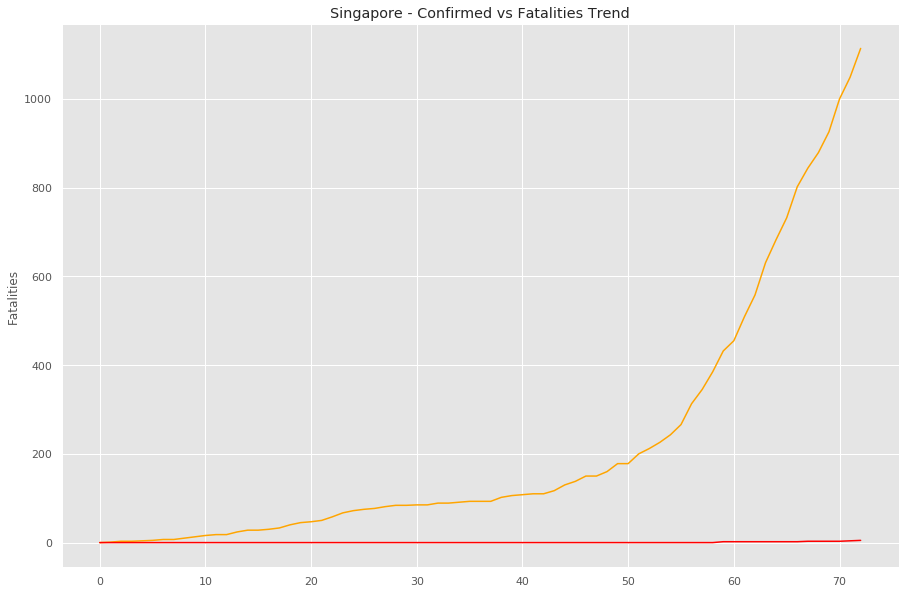

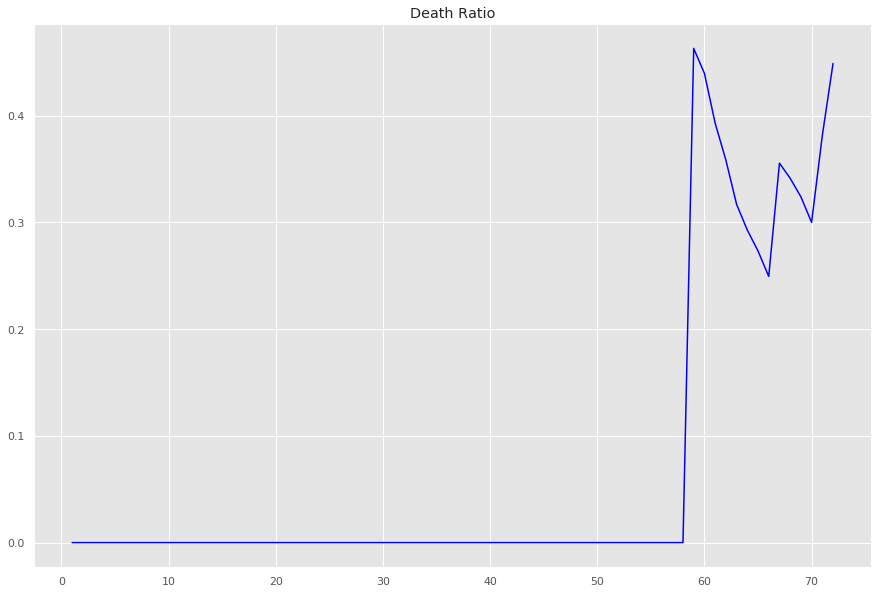

In [50]:
analysis_by_country(w3_df,'Singapore')

# Analysis for Thailand

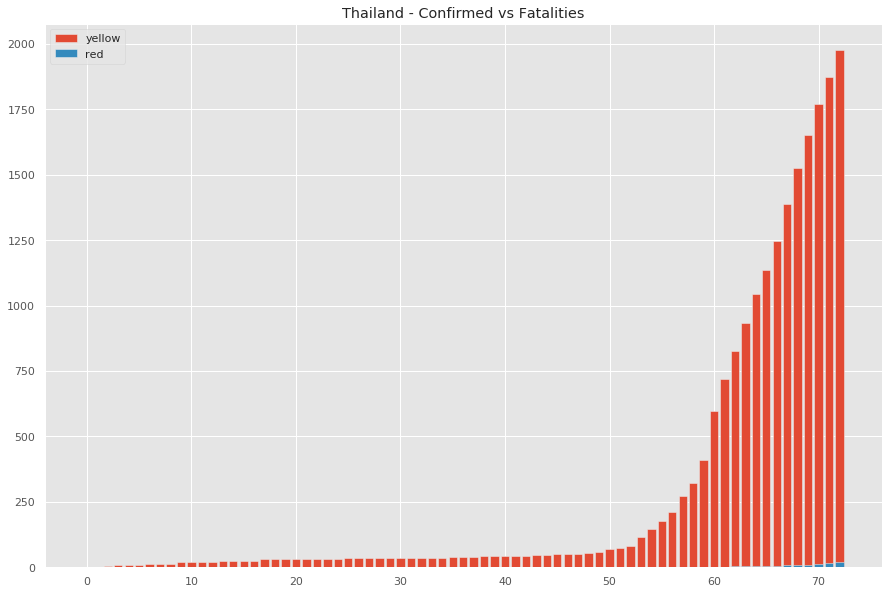

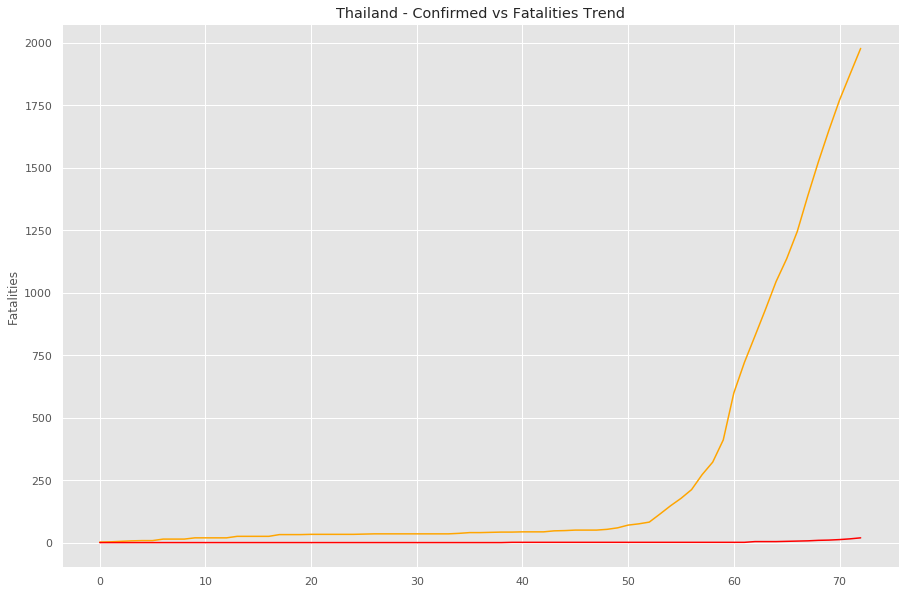

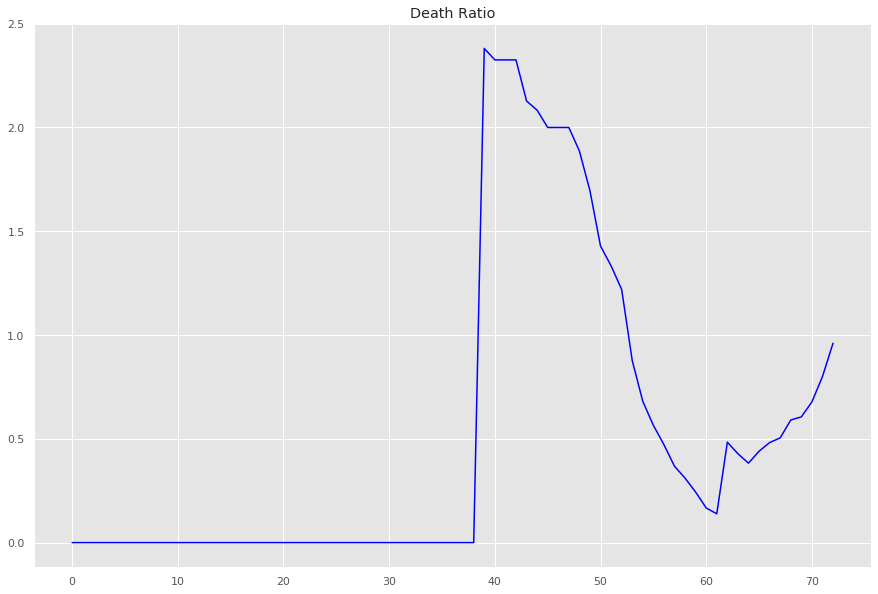

In [51]:
analysis_by_country(w3_df,'Thailand')

# Analysis for S.Korea

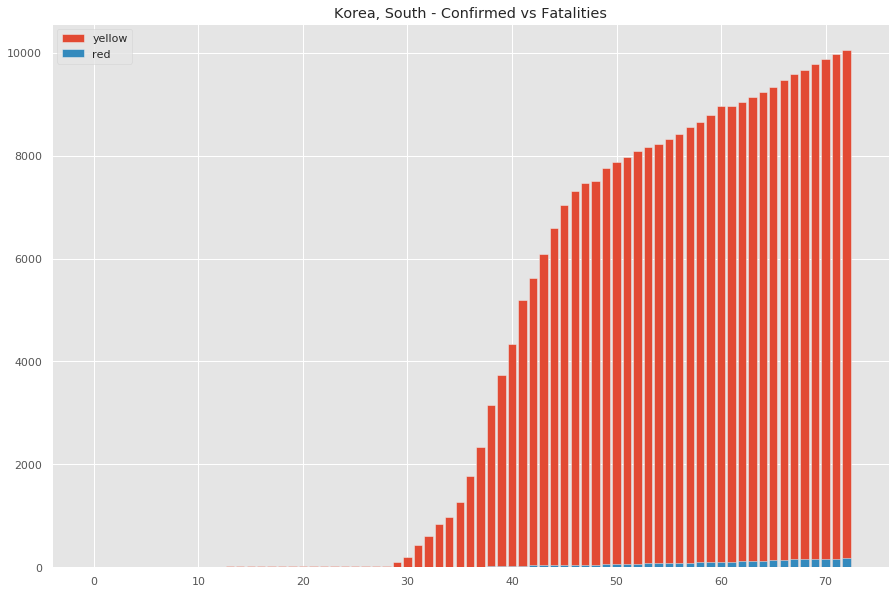

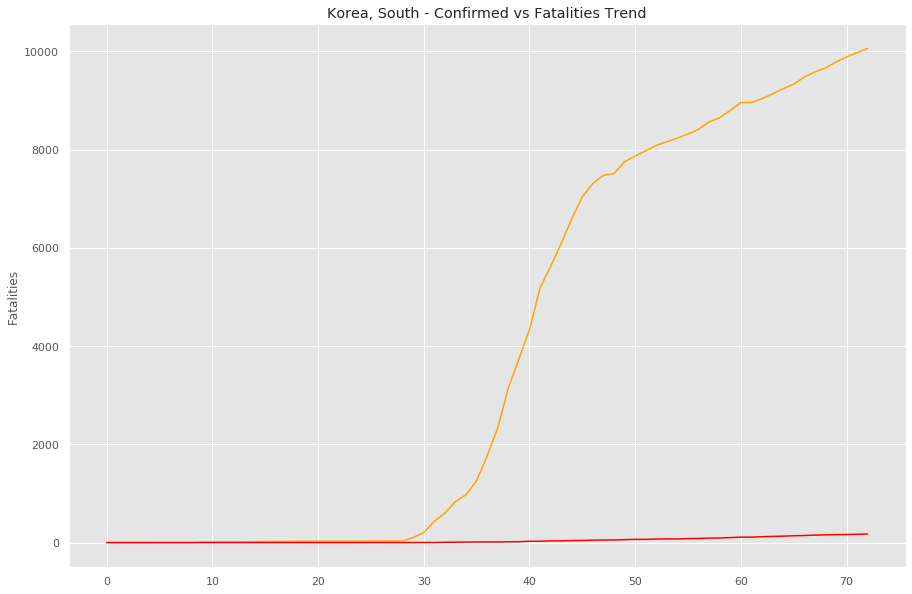

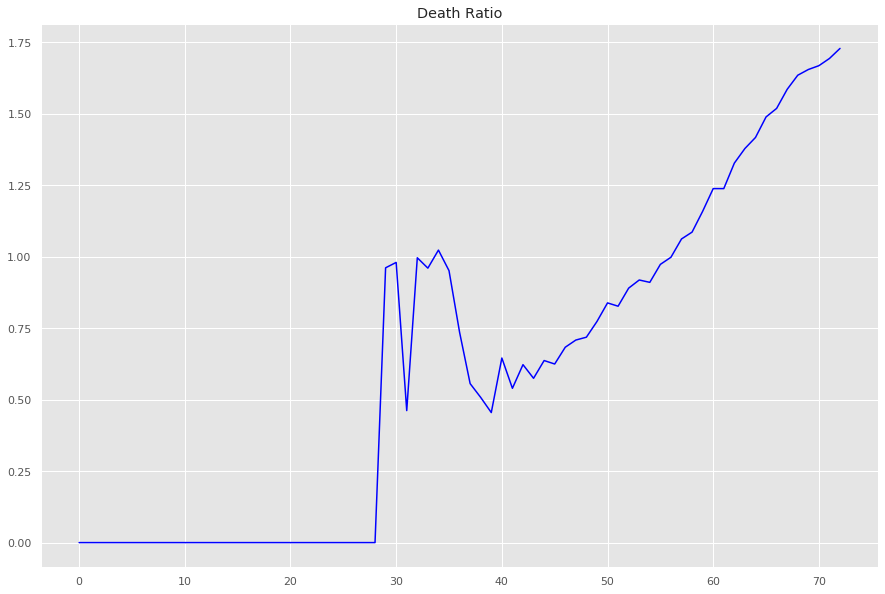

In [52]:
analysis_by_country(w3_df,'Korea, South')

# Analysis for China

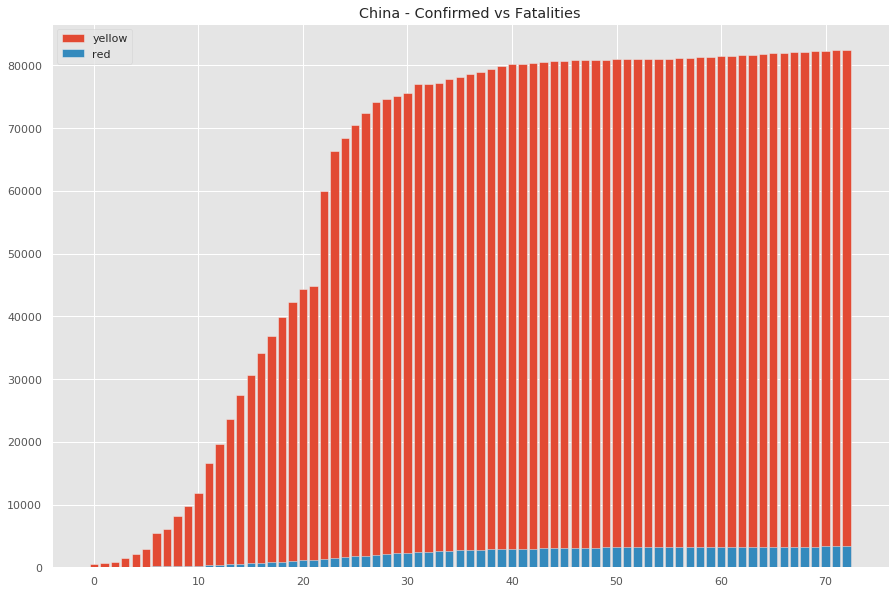

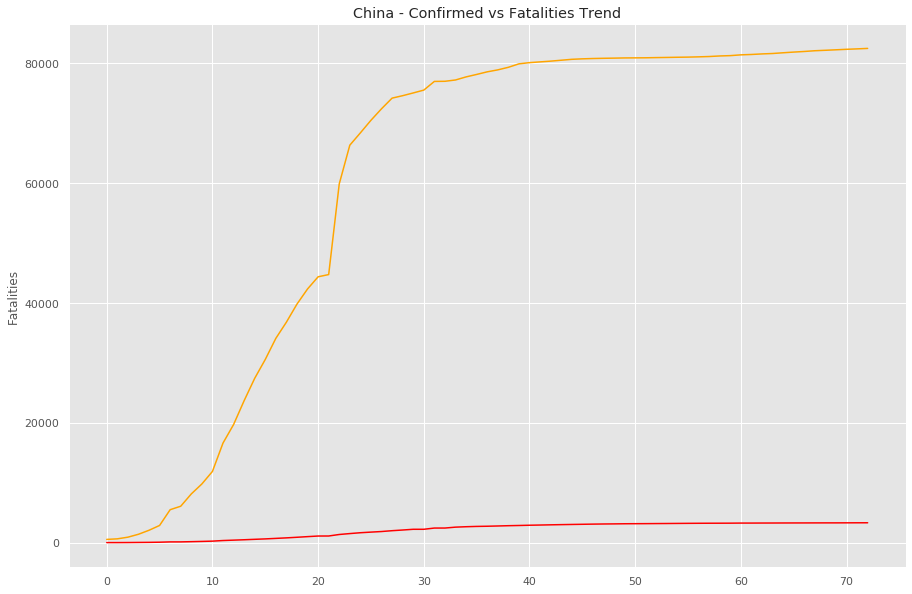

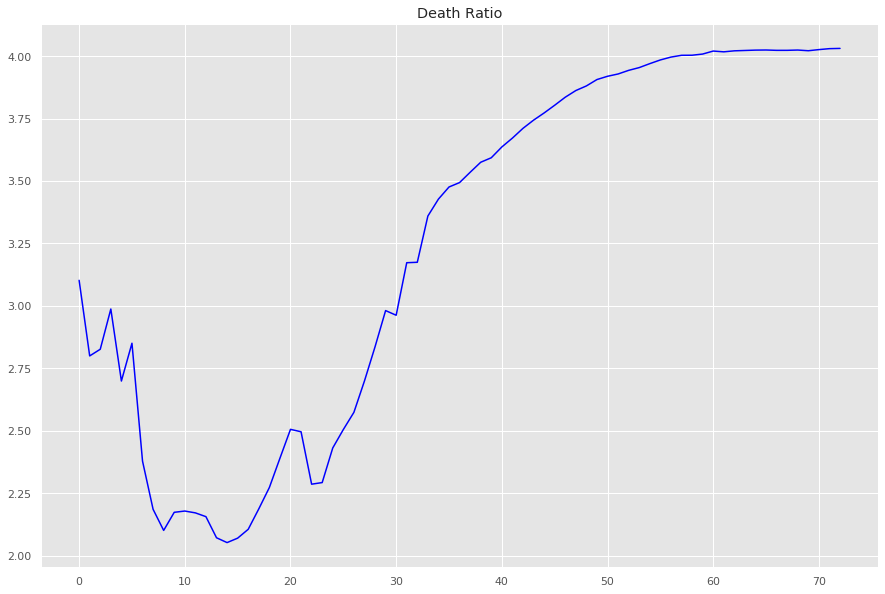

In [53]:
analysis_by_country(w3_df,'China')

# Try to make an interactive map using ipyleaflet - Leaflet JS where when you click a region, it should show the number of cases and trends

In [54]:
country_code=pd.read_csv('country_codes.csv')

In [55]:
country_code=country_code.set_index('Country')

In [56]:
count=0
present=[]
for i in des_Cases_fat.index.values:
    if i in country_code.index.values:
        present.append(i)
        pass
    else:
        #print(i)
        count+=1
print("Number of missing country codes : %s/%s" %(count, len(des_Cases_fat.index.values)))

Number of missing country codes : 34/180


In [57]:
code_dict={}
for i in present:
    #print(i)
    #print(country_code.loc[i]['code'])
    code_dict[country_code.loc[i]['code']]=des_Cases_fat.loc[i]['ConfirmedCases']/des_Cases_fat['ConfirmedCases'].sum()

In [58]:
from pygal_maps_world.maps import World

wm = World()

wm.force_uri_protocol = 'http'

wm.title="corona Affected Regions"

wm.add('corona regions', code_dict)

#make a range[0-1000,1000-10000,10000-50000,50000-100000,100000+] TO DO

wm.render_to_file('map.svg')

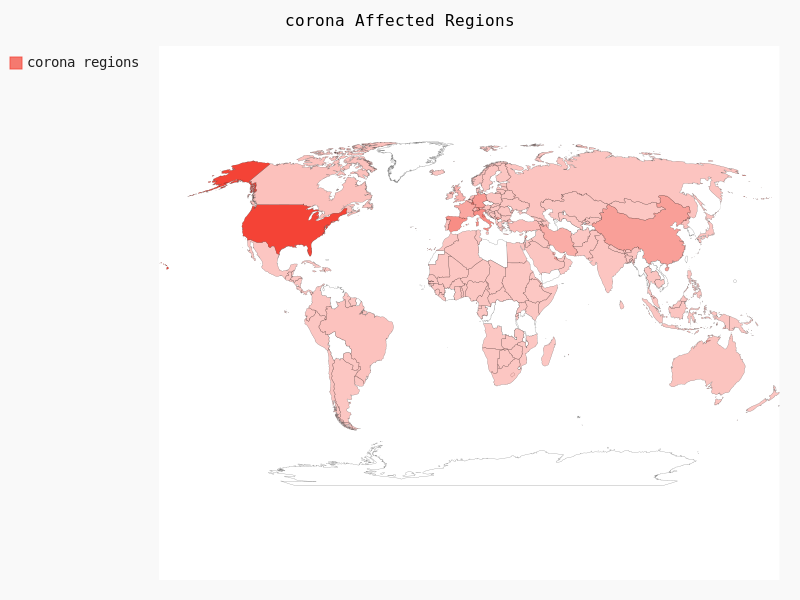

In [59]:
wm

# Province-Wise Analysis 

In [60]:
w3_df_date=w3_df
w3_df_date_count=w3_df_date.loc['2020-04-03'].groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].sum()
w3_df_date_count

w3_df_date_count['Death Ratio']=w3_df_date_count['Fatalities']/w3_df_date_count['ConfirmedCases']*100
w3_df_date_count['Death Ratio Weights']=w3_df_date_count['ConfirmedCases']/w3_df_date_count['ConfirmedCases'].sum()
w3_df_date_count['Death Ratio with Weights']=w3_df_date_count['Death Ratio']*w3_df_date_count['Death Ratio Weights']
w3_df_date_count=w3_df_date_count.reset_index()
w3_df_date_count=w3_df_date_count.set_index('Province_State')

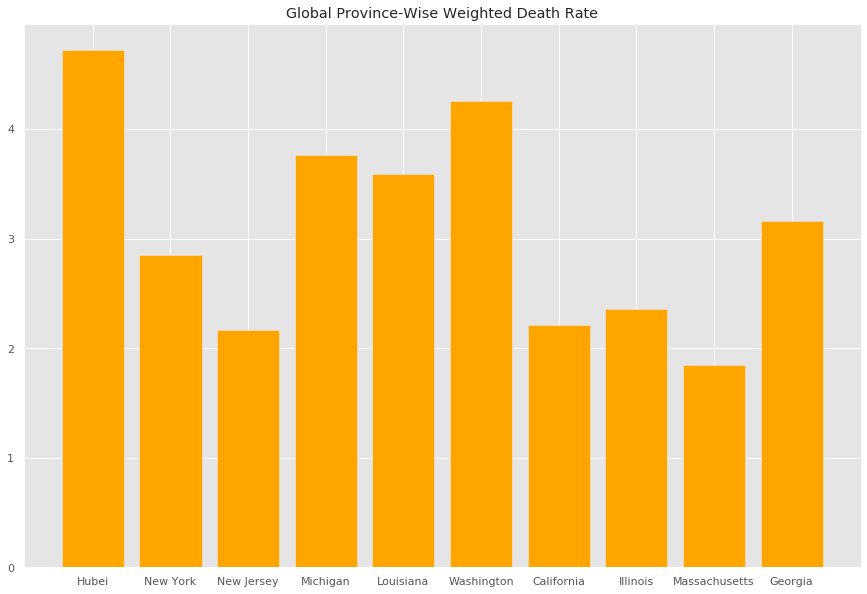

In [61]:
plt.bar(w3_df_date_count.sort_values('Death Ratio with Weights', ascending=False).index.values[:10],w3_df_date_count.sort_values('Death Ratio with Weights', ascending=False)['Death Ratio'][:10], color='orange')
plt.title('Global Province-Wise Weighted Death Rate')
plt.savefig('Facts-And-Figs/Global Province-Wise Weighted Death Rate.png')

In [62]:
w3_df_date_count=w3_df_date_count.reset_index()
w3_df_date_count=w3_df_date_count.set_index('Country_Region')
w3_df_date_count

,Province_State,ConfirmedCases,Fatalities,Death Ratio,Death Ratio Weights,Death Ratio with Weights
Country_Region,,,,,,
Australia,Australian Capital Territory,91.0,1.0,1.098901,0.000241,0.000265
Australia,New South Wales,2389.0,12.0,0.502302,0.006331,0.003180
Australia,Northern Territory,22.0,0.0,0.000000,0.000058,0.000000
Australia,Queensland,873.0,4.0,0.458190,0.002313,0.001060
Australia,South Australia,396.0,0.0,0.000000,0.001049,0.000000
...,...,...,...,...,...,...
United Kingdom,Channel Islands,232.0,4.0,1.724138,0.000615,0.001060
United Kingdom,Gibraltar,95.0,0.0,0.000000,0.000252,0.000000
United Kingdom,Isle of Man,114.0,1.0,0.877193,0.000302,0.000265


# Province-wise Death Ratio and Confirmed vs Fatalities

In [63]:
def province_wise_deathratio(w3_df,country):
    w3_df_date=w3_df
    w3_df_date_count=w3_df_date.loc['2020-04-03'].groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].sum()

    w3_df_date_count['Death Ratio']=w3_df_date_count['Fatalities']/w3_df_date_count['ConfirmedCases']*100
    w3_df_date_count['Death Ratio Weights']=w3_df_date_count['ConfirmedCases']/w3_df_date_count['ConfirmedCases'].sum()
    w3_df_date_count['Death Ratio with Weights']=w3_df_date_count['Death Ratio']*w3_df_date_count['Death Ratio Weights']
    w3_df_date_count=w3_df_date_count.reset_index()
    w3_df_date_count=w3_df_date_count.set_index('Province_State')
    
    w3_df_date_count=w3_df_date_count.reset_index()
    w3_df_date_count=w3_df_date_count.set_index('Country_Region')
    
    plt.bar(w3_df_date_count.loc[country].sort_values(['Death Ratio with Weights'],ascending=False)['Province_State'][:10],w3_df_date_count.loc[country].sort_values(['Death Ratio with Weights'], ascending=False)['Death Ratio'][:10], color='Grey')
    plt.title('Province-wise Death Rate in {}'.format(country))
    plt.show()
    
    
    plt.bar(w3_df_date_count.loc[country].sort_values(['ConfirmedCases'],ascending=False)['Province_State'][:10],w3_df_date_count.loc[country].sort_values(['ConfirmedCases'],ascending=False)['ConfirmedCases'][:10], color='Yellow')
    plt.bar(w3_df_date_count.loc[country].sort_values(['ConfirmedCases'],ascending=False)['Province_State'][:10],w3_df_date_count.loc['US'].sort_values(['ConfirmedCases'],ascending=False)['Fatalities'][:10], color='red')
    plt.title('Province-wise Confirmed vs Fatalities in {}'.format(country))
    plt.show()

# Province-Wise Analysis for Canada 

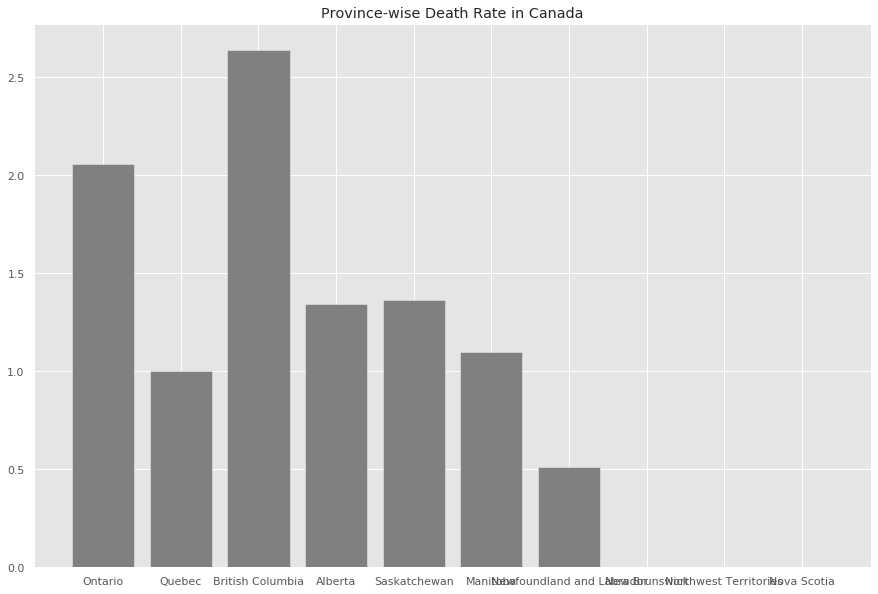

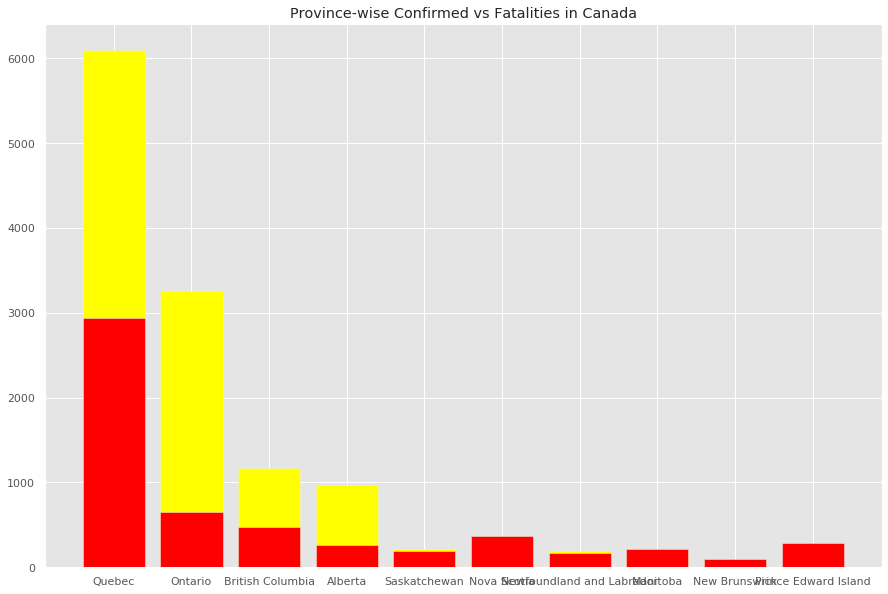

In [64]:
province_wise_deathratio(w3_df,'Canada')

# Analysis for US - Province-Wise

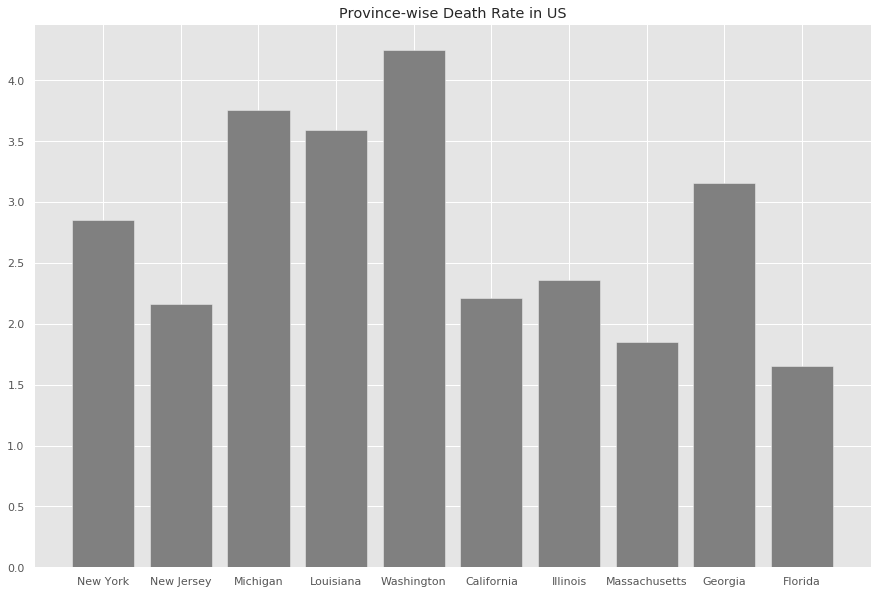

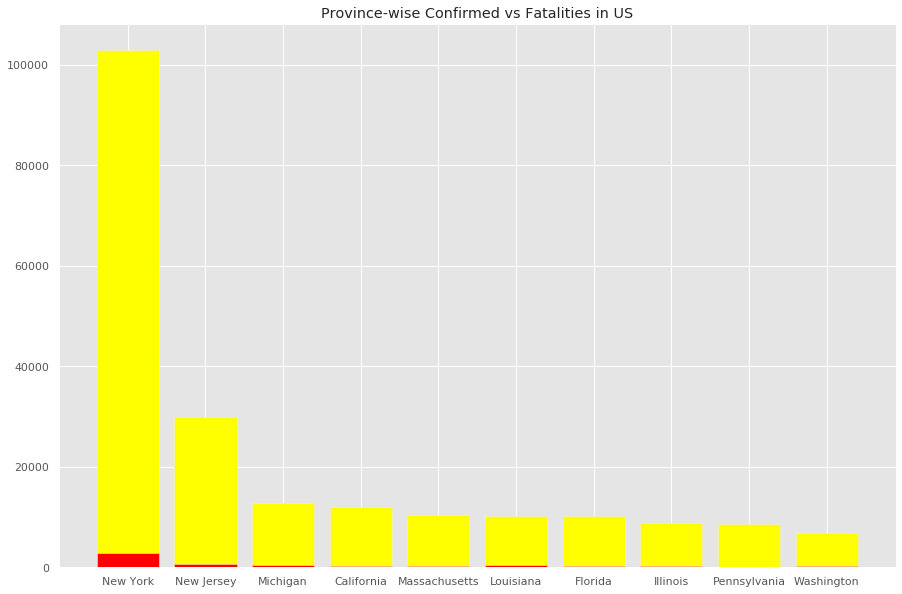

In [65]:
province_wise_deathratio(w3_df,'US')

# NEW CASES - Province Wise Analysis

In [75]:
def Rise_in_Cases(w3_df,country,province):
    Cases_fat=w3_df.groupby(['Country_Region','Province_State','Date'])['Date','ConfirmedCases','Fatalities'].sum()
    Cases_fat1=Cases_fat.reset_index()
    Cases_fat1=Cases_fat1.set_index(['Country_Region','Province_State'])
    Cases_fat2=Cases_fat1.loc[[country,province]]
    Cases_fat2=Cases_fat2.reset_index()
    Cases_fat2=Cases_fat2.set_index('Date')
    Cases_fat2[Cases_fat2['Province_State']==province]['ConfirmedCases'].diff().plot()
    plt.title("In {} - {}, The Number of New Cases Observed is shown below".format(province,country))
    plt.legend()
    plt.show()
    plt.savefig('New Cases/{}-{}.png'.format(country,province))
    
    Cases_fat2[Cases_fat2['Province_State']==province]['Fatalities'].diff().plot()
    plt.title("In {} - {}, The Number of New Fatalities Observed is shown below".format(province,country))
    plt.legend()
    plt.show()
    plt.savefig('New Cases/{}-{}-New Fatalities.png'.format(country,province))
    

In [76]:
w3_df['Province_State']=w3_df['Province_State'].fillna('')
w3_df[['Country_Region','Province_State']].reset_index()
w3_df['Country-Province']=w3_df['Country_Region']+'-'+w3_df['Province_State']
for i in w3_df[w3_df['Province_State']!='']['Country-Province'].unique():
    print(i)

Australia-Australian Capital Territory
Australia-New South Wales
Australia-Northern Territory
Australia-Queensland
Australia-South Australia
Australia-Tasmania
Australia-Victoria
Australia-Western Australia
Canada-Alberta
Canada-British Columbia
Canada-Manitoba
Canada-New Brunswick
Canada-Newfoundland and Labrador
Canada-Northwest Territories
Canada-Nova Scotia
Canada-Ontario
Canada-Prince Edward Island
Canada-Quebec
Canada-Saskatchewan
Canada-Yukon
China-Anhui
China-Beijing
China-Chongqing
China-Fujian
China-Gansu
China-Guangdong
China-Guangxi
China-Guizhou
China-Hainan
China-Hebei
China-Heilongjiang
China-Henan
China-Hong Kong
China-Hubei
China-Hunan
China-Inner Mongolia
China-Jiangsu
China-Jiangxi
China-Jilin
China-Liaoning
China-Macau
China-Ningxia
China-Qinghai
China-Shaanxi
China-Shandong
China-Shanghai
China-Shanxi
China-Sichuan
China-Tianjin
China-Tibet
China-Xinjiang
China-Yunnan
China-Zhejiang
Denmark-Faroe Islands
Denmark-Greenland
France-French Guiana
France-French Polynesi

# Select one of the Country, Province
Australia-Australian Capital Territory
Australia-New South Wales
Australia-Northern Territory
Australia-Queensland
Australia-South Australia
Australia-Tasmania
Australia-Victoria
Australia-Western Australia
Canada-Alberta
Canada-British Columbia
Canada-Manitoba
Canada-New Brunswick
Canada-Newfoundland and Labrador
Canada-Northwest Territories
Canada-Nova Scotia
Canada-Ontario
Canada-Prince Edward Island
Canada-Quebec
Canada-Saskatchewan
Canada-Yukon
China-Anhui
China-Beijing
China-Chongqing
China-Fujian
China-Gansu
China-Guangdong
China-Guangxi
China-Guizhou
China-Hainan
China-Hebei
China-Heilongjiang
China-Henan
China-Hong Kong
China-Hubei
China-Hunan
China-Inner Mongolia
China-Jiangsu
China-Jiangxi
China-Jilin
China-Liaoning
China-Macau
China-Ningxia
China-Qinghai
China-Shaanxi
China-Shandong
China-Shanghai
China-Shanxi
China-Sichuan
China-Tianjin
China-Tibet
China-Xinjiang
China-Yunnan
China-Zhejiang
Denmark-Faroe Islands
Denmark-Greenland
France-French Guiana
France-French Polynesia
France-Guadeloupe
France-Martinique
France-Mayotte
France-New Caledonia
France-Reunion
France-Saint Barthelemy
France-St Martin
Netherlands-Aruba
Netherlands-Curacao
Netherlands-Sint Maarten
US-Alabama
US-Alaska
US-Arizona
US-Arkansas
US-California
US-Colorado
US-Connecticut
US-Delaware
US-District of Columbia
US-Florida
US-Georgia
US-Guam
US-Hawaii
US-Idaho
US-Illinois
US-Indiana
US-Iowa
US-Kansas
US-Kentucky
US-Louisiana
US-Maine
US-Maryland
US-Massachusetts
US-Michigan
US-Minnesota
US-Mississippi
US-Missouri
US-Montana
US-Nebraska
US-Nevada
US-New Hampshire
US-New Jersey
US-New Mexico
US-New York
US-North Carolina
US-North Dakota
US-Ohio
US-Oklahoma
US-Oregon
US-Pennsylvania
US-Puerto Rico
US-Rhode Island
US-South Carolina
US-South Dakota
US-Tennessee
US-Texas
US-Utah
US-Vermont
US-Virgin Islands
US-Virginia
US-Washington
US-West Virginia
US-Wisconsin
US-Wyoming
United Kingdom-Anguilla
United Kingdom-Bermuda
United Kingdom-British Virgin Islands
United Kingdom-Cayman Islands
United Kingdom-Channel Islands
United Kingdom-Gibraltar
United Kingdom-Isle of Man
United Kingdom-Montserrat
United Kingdom-Turks and Caicos Islands


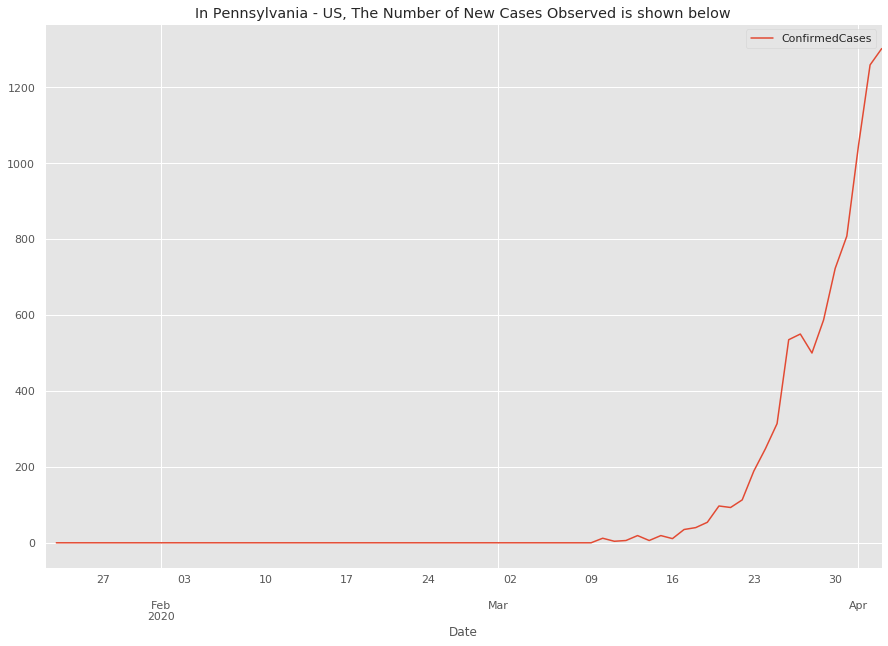

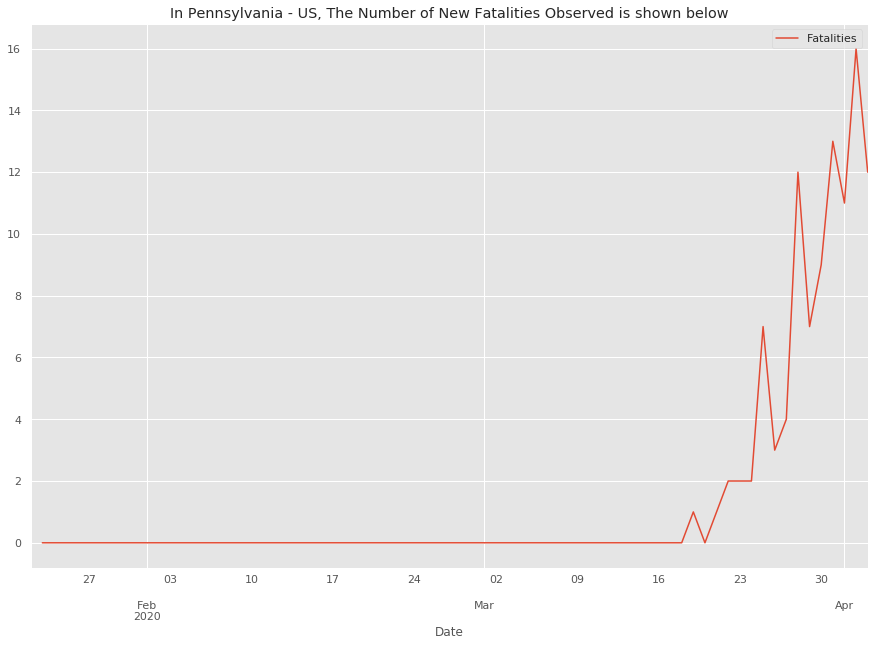

<Figure size 1080x720 with 0 Axes>

In [77]:
w3_df=w3_df.reset_index()
Rise_in_Cases(w3_df, 'US','Pennsylvania')

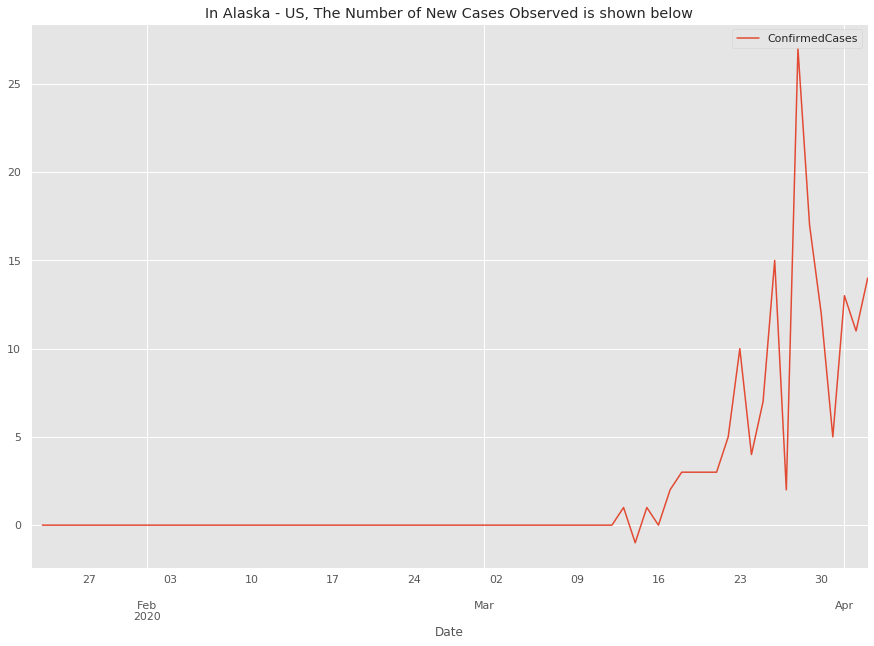

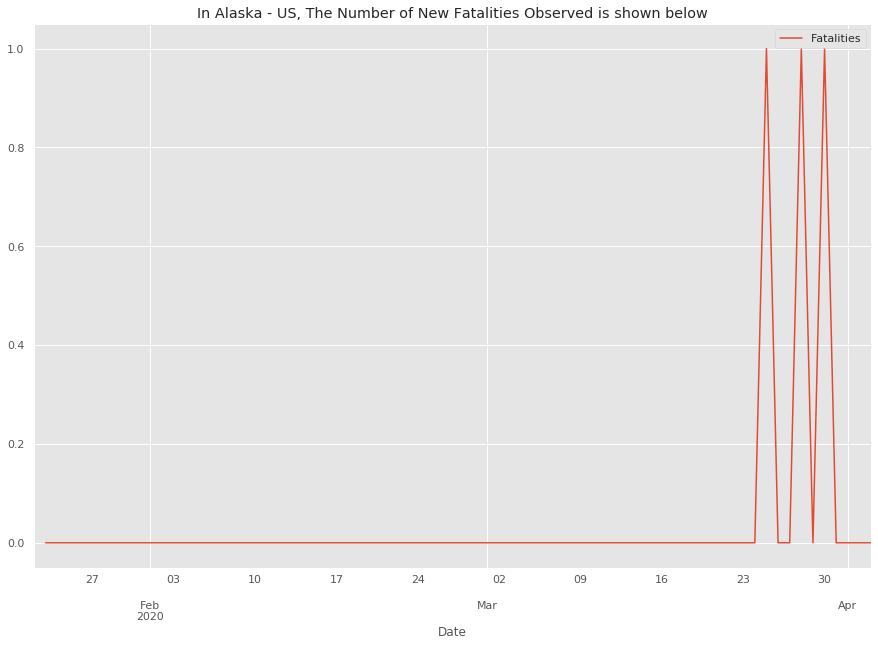

<Figure size 1080x720 with 0 Axes>

In [78]:
#w3_df=w3_df.reset_index()
Rise_in_Cases(w3_df,'US','Alaska')

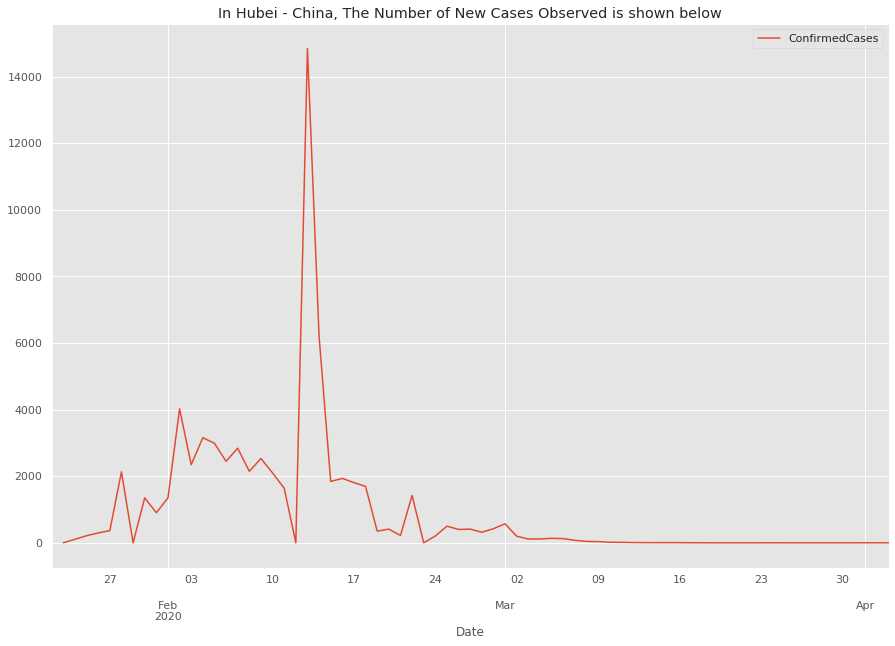

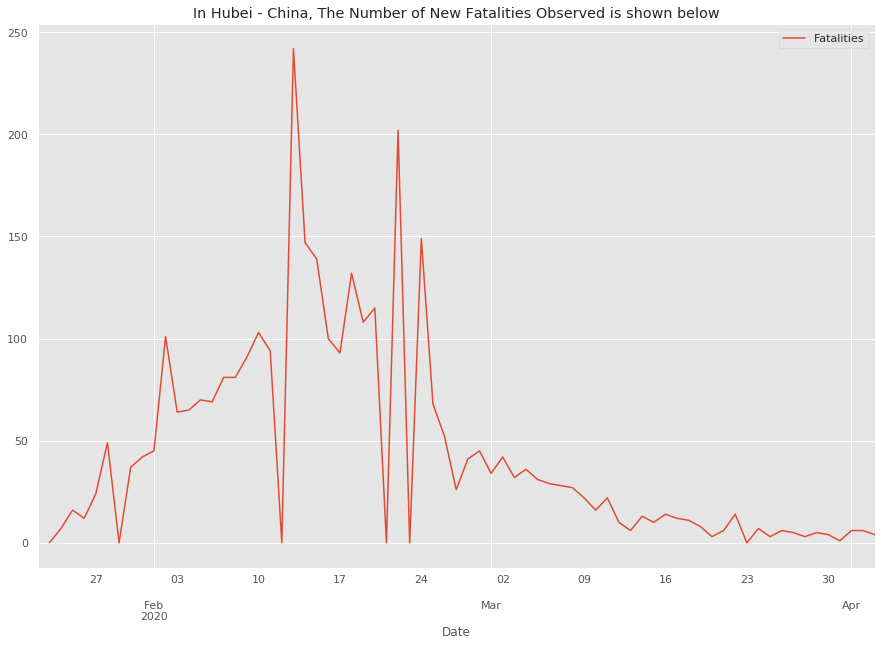

<Figure size 1080x720 with 0 Axes>

In [79]:
Rise_in_Cases(w3_df,'China','Hubei')

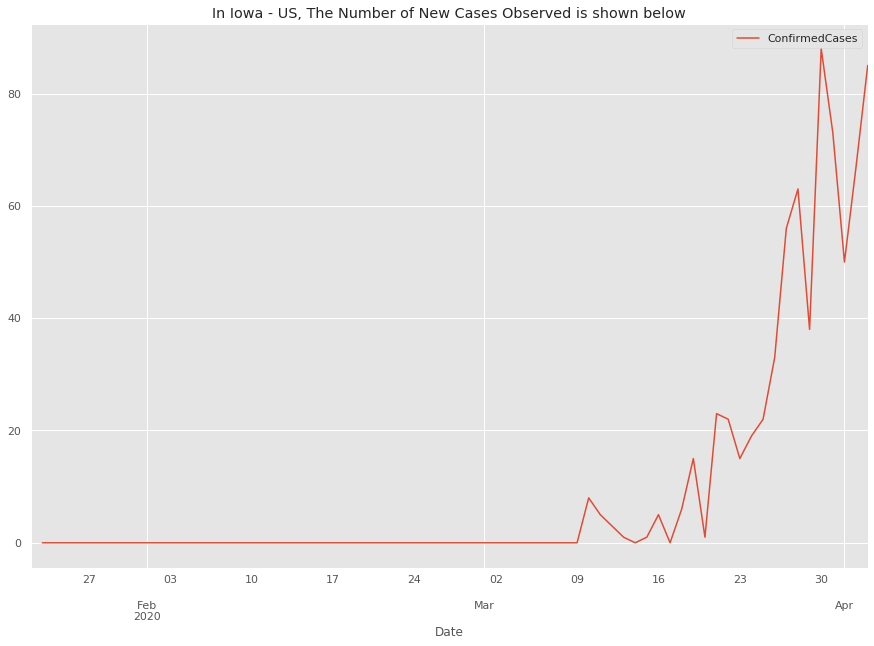

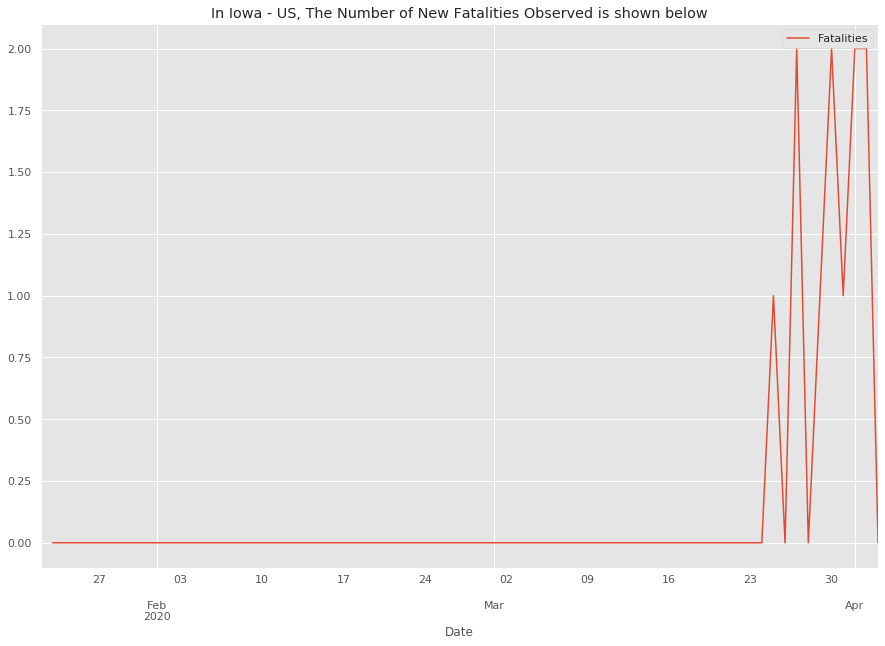

<Figure size 1080x720 with 0 Axes>

In [80]:
Rise_in_Cases(w3_df,'US','Iowa')

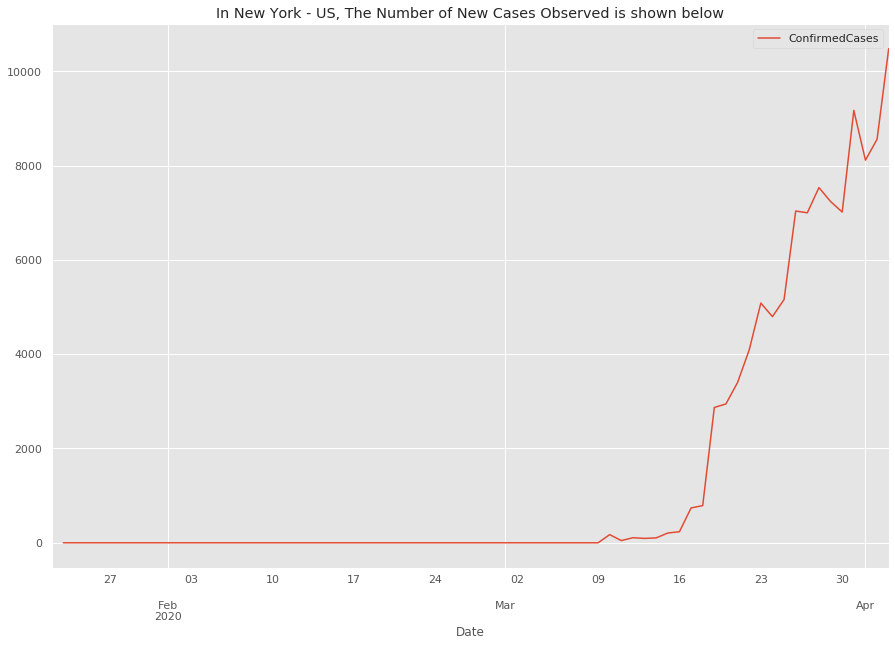

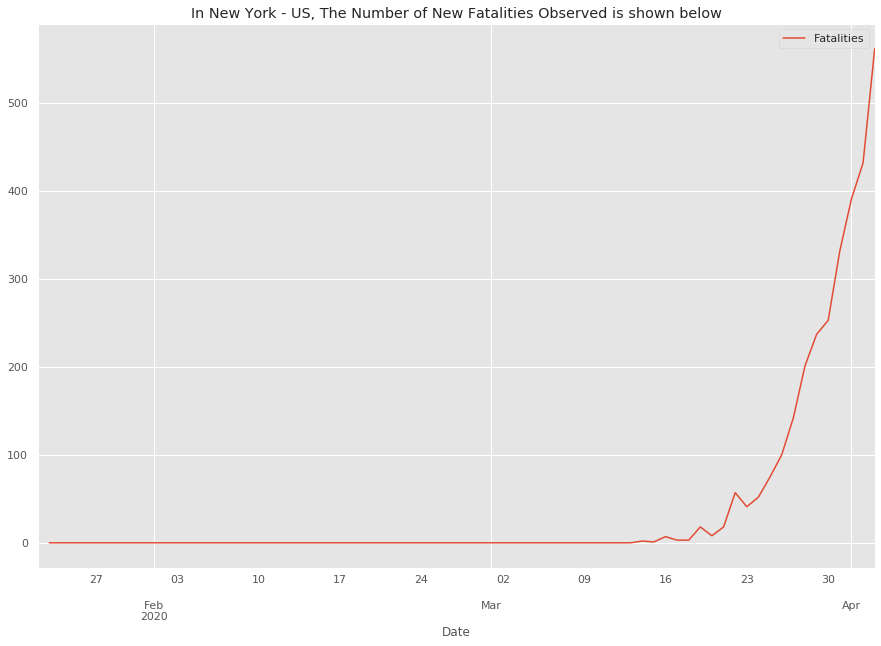

<Figure size 1080x720 with 0 Axes>

In [81]:
Rise_in_Cases(w3_df,'US','New York')

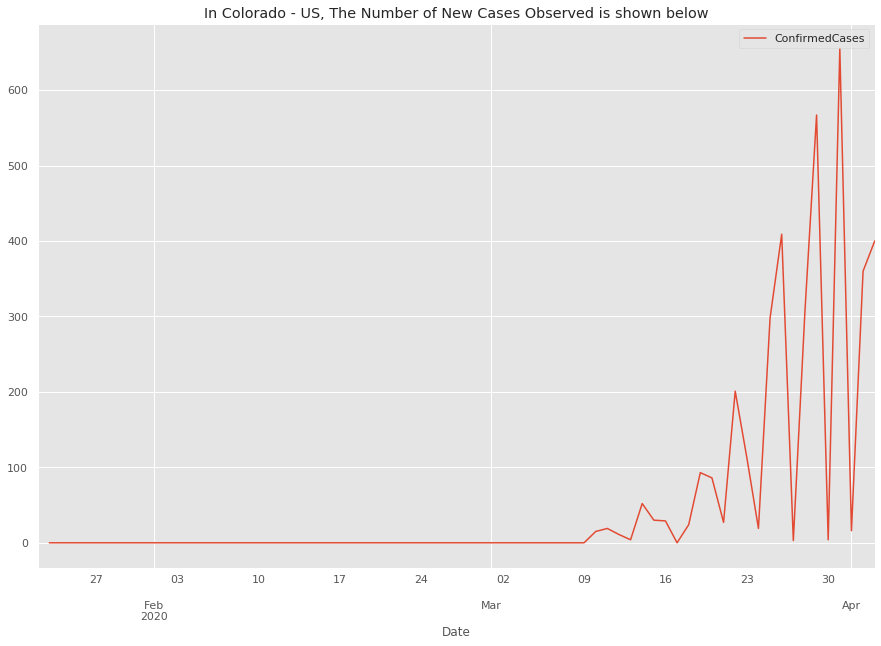

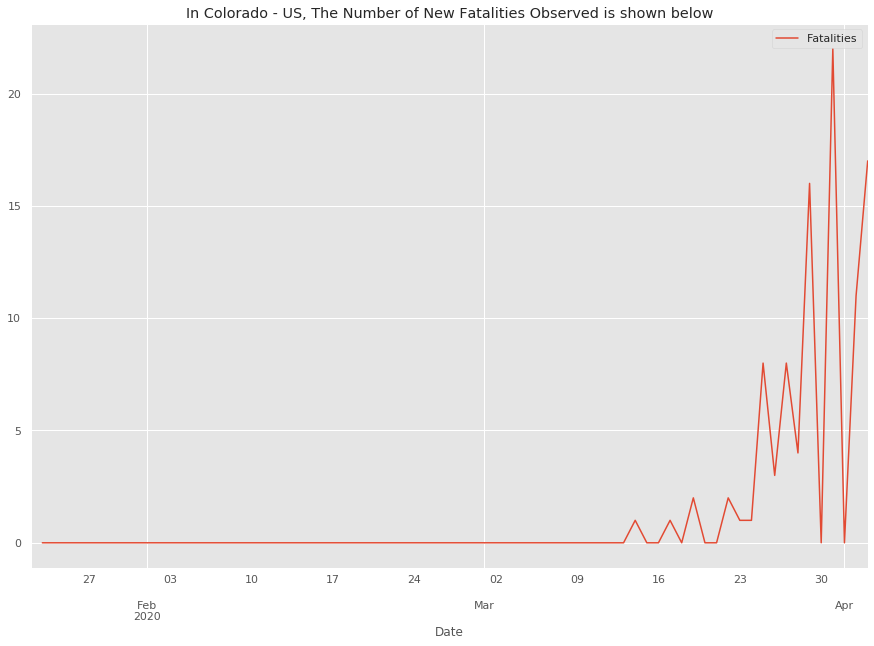

<Figure size 1080x720 with 0 Axes>

In [82]:
Rise_in_Cases(w3_df,'US','Colorado')

In [85]:
def Rise_in_Cases_country(w3_df,country):
    Cases_fat=w3_df.groupby(['Country_Region',"Date"])['Date','ConfirmedCases','Fatalities'].sum()
    Cases_fat1=Cases_fat.reset_index()
    Cases_fat1=Cases_fat1.set_index(['Country_Region'])
    Cases_fat2=Cases_fat1.loc[country]
    Cases_fat2=Cases_fat2.reset_index()
    Cases_fat2=Cases_fat2.set_index('Date')
    Cases_fat2[Cases_fat2['Country_Region']==country]['ConfirmedCases'].diff().plot()
    plt.title("In {}, The Number of New Cases Observed is shown below".format(country))
    plt.legend()
    plt.savefig('New Cases/{}.png'.format(country))
    plt.show()
    
    Cases_fat2[Cases_fat2['Country_Region']==country]['Fatalities'].diff().plot()
    plt.title("In {}, The Number of New Fatalities Observed is shown below".format(country))
    plt.legend()
    plt.savefig('New Cases/{}-New-Fatalities.png'.format(country))
    plt.show()

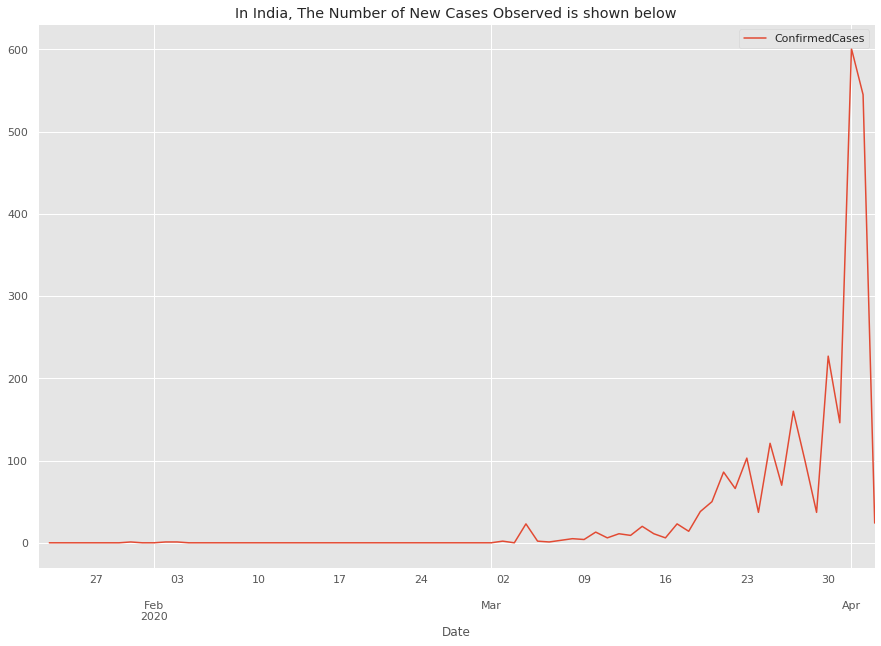

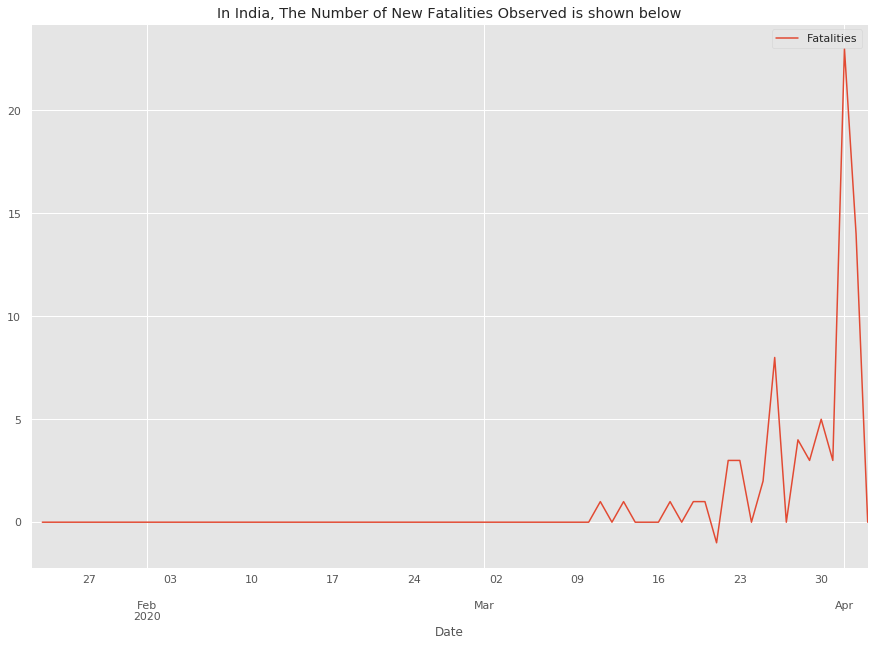

In [87]:
Rise_in_Cases_country(w3_df,"India")